<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<hr>
<h1><center>MACHINE LEARNING : HOMEWORK 3</center></h1>
<h1><center>Data 1 : Wealth prediction</center></h1>
<h4>Hector LANDES - M10601810</h4>
<h4>Machine Learning - CS5087701</h4>

In [1]:
#pip install keras
#pip install tensorflow
#pip install ann_visualizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz;
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'

Using TensorFlow backend.


In [2]:
path = r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\adult.csv'

In [3]:
data = pd.read_csv (path, names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
                           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                                 "hours_per_week", "native_country", "wealth"],
                   index_col=False)

<ul>
<h3>Preprocessing from the HM1</3>
</ul>

In [4]:
data = data[(data.astype(str) != ' ?').all(axis=1)]

In [5]:
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex'])

In [6]:
data['native_country'] = data['native_country'].str.strip()

In [7]:
data['native_country'] = data['native_country'].replace(['Japan', 'Cambodia', "Philippines", 
                                                         "India", "China", "Vietnam", "Taiwan", "Iran", 
                                                         "Hong", "Laos", "Thailand"], 'Asia')
data['native_country'] = data['native_country'].replace(["Germany", "England", "Italy", "Poland", "Portugal",
                                                         "Greece", "France", "Ireland", "Yugoslavia", "Hungary", 
                                                         "Scotland", "Holand-Netherlands"], 'Europe')
data['native_country'] = data['native_country'].replace(["Mexico","El-Salvador", "Cuba", "Jamaica", 'South', 
                                                         "Dominican-Republic", "Guatemala", "Columbia", "Haiti", 
                                                         "Nicaragua", "Peru", "Ecuador", "Trinadad&Tobago", "Honduras"], 
                                                        'South&Central America')
data['native_country'] = data['native_country'].replace(["United-States", 'Puerto-Rico', 'Canada',
                                                         'Outlying-US(Guam-USVI-etc)'], 'United_States')

In [8]:
data.rename(columns={'native_country':'native_region'}, inplace=True)

In [9]:
data = pd.get_dummies(data, columns=['native_region'])

In [10]:
non_zero_value = data.loc[data["capital_loss"] != 0]

In [11]:
data.loc[data["capital_loss"] != 0, ["capital_loss"]] = 1

In [12]:
non_zero_value = data.loc[data["capital_gain"] != 0]

In [13]:
data.loc[data["capital_gain"] != 0, ["capital_gain"]] = 1

In [14]:
data = data.drop(['fnlwgt'], axis=1)

In [15]:
data['bi_wealth'] = data.apply(lambda row: 1 if '>50K'in row['wealth'] else 0, axis=1)

In [16]:
data = data.drop(['wealth'], axis=1)

<ul>
<h3> Normalize the data </h3> 
</ul>

In [17]:
#norm_df = (data.columns[:66] - data.columns[:66].mean()) / data.columns[:66].std()
#OR
norm_df = (data - data.min()) / (data.max() - data.min())

In [18]:
norm_df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States,bi_wealth
0,0.301370,0.800000,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.452055,0.800000,0.0,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.287671,0.533333,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.493151,0.400000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.150685,0.800000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<ul>
<h3> X as the Feature Matrix </h3> 
</ul>

In [19]:
X = norm_df[norm_df.columns[:66]]
X[0:2]

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States
0,0.301370,0.8,1.0,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.452055,0.8,0.0,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


<ul>
<h3> Y as the Target Value </h3> 
</ul>

In [20]:
Y = norm_df["bi_wealth"].astype('int')
Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: bi_wealth, dtype: int32

Now we will split the data in training and testing data

In [21]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)

In [22]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (24129, 66)    Testing: (6033, 66)
Target value   ->   Training: (24129,)       Testing: (6033,)


<ul>
<h3>Deep Learning Model</3>
</ul>

0 layer model

In [37]:
model = Sequential()
model.add(Dense(1, input_dim=66, activation='sigmoid'))

1 layers model

In [38]:
model1 = Sequential()
model1.add(Dense(12, input_dim=66, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

2 layers model

In [39]:
model2 = Sequential()
model2.add(Dense(12, input_dim=66, activation='sigmoid'))
model2.add(Dense(8, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

3 layers model

In [40]:
model3 = Sequential()
model3.add(Dense(12, input_dim=66, activation='sigmoid'))
model3.add(Dense(8, activation='sigmoid'))
model3.add(Dense(4, activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))

4 layers model

In [42]:
model4 = Sequential()
model4.add(Dense(12, input_dim=66, activation='sigmoid'))
model4.add(Dense(9, activation='sigmoid'))
model4.add(Dense(6, activation='sigmoid'))
model4.add(Dense(3, activation='sigmoid'))
model4.add(Dense(1, activation='sigmoid'))

6 layers model

In [43]:
model6 = Sequential()
model6.add(Dense(12, input_dim=66, activation='sigmoid'))
model6.add(Dense(10, activation='sigmoid'))
model6.add(Dense(8, activation='sigmoid'))
model6.add(Dense(6, activation='sigmoid'))
model6.add(Dense(4, activation='sigmoid'))
model6.add(Dense(2, activation='sigmoid'))
model6.add(Dense(1, activation='sigmoid'))

11 layers model

In [44]:
model12 = Sequential()
model12.add(Dense(12, input_dim=66, activation='sigmoid'))
model12.add(Dense(11, activation='sigmoid'))
model12.add(Dense(10, activation='sigmoid'))
model12.add(Dense(9, activation='sigmoid'))
model12.add(Dense(8, activation='sigmoid'))
model12.add(Dense(7, activation='sigmoid'))
model12.add(Dense(6, activation='sigmoid'))
model12.add(Dense(5, activation='sigmoid'))
model12.add(Dense(4, activation='sigmoid'))
model12.add(Dense(3, activation='sigmoid'))
model12.add(Dense(2, activation='sigmoid'))
model12.add(Dense(1, activation='sigmoid'))

Dropout model

In [119]:
from keras.layers import Dense, Flatten, Activation, Dropout

In [149]:
model_drop = Sequential()
model_drop.add(Dense(12, input_dim=66, activation='sigmoid'))
model_drop.add(Dropout(0.2))
model_drop.add(Activation('sigmoid'))
model_drop.add(Dense(8))
model_drop.add(Dropout(0.2))
model_drop.add(Activation('sigmoid'))
model_drop.add(Dense(1, activation='sigmoid'))

<ul>
<h3>Compile Keras Model<h/3>
</ul>

In [45]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [46]:
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [108]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [48]:
model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [49]:
model4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [50]:
model6.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [51]:
model12.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [150]:
model_drop.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])

<ul>
<h3>Fit Keras Model</h3>
</ul>

In [52]:
history = model.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=100, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 0s 13us/step - loss: 0.5618 - accuracy: 0.7270 - val_loss: 0.5268 - val_accuracy: 0.7364
Epoch 2/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.4999 - accuracy: 0.7503 - val_loss: 0.4909 - val_accuracy: 0.7413
Epoch 3/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.4724 - accuracy: 0.7566 - val_loss: 0.4683 - val_accuracy: 0.7499
Epoch 4/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.4542 - accuracy: 0.7723 - val_loss: 0.4525 - val_accuracy: 0.7663
Epoch 5/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.4412 - accuracy: 0.7819 - val_loss: 0.4408 - val_accuracy: 0.7769
Epoch 6/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.4312 - accuracy: 0.7937 - val_loss: 0.4315 - val_accuracy: 0.7910
Epoch 7/100
24129/24129 [==============================] - 0s 8us/st

24129/24129 [==============================] - 0s 8us/step - loss: 0.3582 - accuracy: 0.8360 - val_loss: 0.3589 - val_accuracy: 0.8329
Epoch 57/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.3579 - accuracy: 0.8360 - val_loss: 0.3586 - val_accuracy: 0.8331
Epoch 58/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.3576 - accuracy: 0.8361 - val_loss: 0.3583 - val_accuracy: 0.8334
Epoch 59/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.3574 - accuracy: 0.8361 - val_loss: 0.3580 - val_accuracy: 0.8337
Epoch 60/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.3571 - accuracy: 0.8362 - val_loss: 0.3577 - val_accuracy: 0.8339
Epoch 61/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.3568 - accuracy: 0.8359 - val_loss: 0.3574 - val_accuracy: 0.8339
Epoch 62/100
24129/24129 [==============================] - 0s 8us/step - loss: 0.3566 - accuracy: 0.8362 - val_loss: 0.3571 

In [275]:
history1 = model1.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=1000, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3467 - accuracy: 0.8372 - val_loss: 0.3477 - val_accuracy: 0.8397
Epoch 2/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3450 - accuracy: 0.8379 - val_loss: 0.3474 - val_accuracy: 0.8404
Epoch 3/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3449 - accuracy: 0.8383 - val_loss: 0.3472 - val_accuracy: 0.8404
Epoch 4/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3447 - accuracy: 0.8384 - val_loss: 0.3470 - val_accuracy: 0.8402
Epoch 5/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3446 - accuracy: 0.8385 - val_loss: 0.3469 - val_accuracy: 0.8400
Epoch 6/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3446 - accuracy: 0.8385 - val_loss: 0.3468 - val_accuracy: 0.8399
Epoch 7/1000
24129/24129 [==============================] - 0s 

Epoch 110/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3423 - accuracy: 0.8403 - val_loss: 0.3445 - val_accuracy: 0.8399
Epoch 111/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3423 - accuracy: 0.8399 - val_loss: 0.3445 - val_accuracy: 0.8397
Epoch 112/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3423 - accuracy: 0.8405 - val_loss: 0.3445 - val_accuracy: 0.8402
Epoch 113/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3422 - accuracy: 0.8405 - val_loss: 0.3445 - val_accuracy: 0.8405
Epoch 114/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3422 - accuracy: 0.8401 - val_loss: 0.3445 - val_accuracy: 0.8404
Epoch 115/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3422 - accuracy: 0.8402 - val_loss: 0.3444 - val_accuracy: 0.8395
Epoch 116/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3422 - accuracy:

KeyboardInterrupt: 

In [109]:
history2 = model2.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=10000, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/10000
24129/24129 [==============================] - 0s 12us/step - loss: 0.3353 - accuracy: 0.8423 - val_loss: 0.3365 - val_accuracy: 0.8395
Epoch 2/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3354 - accuracy: 0.8422 - val_loss: 0.3362 - val_accuracy: 0.8394
Epoch 3/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3353 - accuracy: 0.8428 - val_loss: 0.3361 - val_accuracy: 0.8407
Epoch 4/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3353 - accuracy: 0.8426 - val_loss: 0.3362 - val_accuracy: 0.8395
Epoch 5/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3353 - accuracy: 0.8424 - val_loss: 0.3361 - val_accuracy: 0.8399
Epoch 6/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3353 - accuracy: 0.8428 - val_loss: 0.3361 - val_accuracy: 0.8397
Epoch 7/10000
24129/24129 [=============================

24129/24129 [==============================] - 0s 9us/step - loss: 0.3346 - accuracy: 0.8426 - val_loss: 0.3359 - val_accuracy: 0.8386
Epoch 110/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3346 - accuracy: 0.8427 - val_loss: 0.3358 - val_accuracy: 0.8400
Epoch 111/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3346 - accuracy: 0.8433 - val_loss: 0.3358 - val_accuracy: 0.8405
Epoch 112/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3346 - accuracy: 0.8429 - val_loss: 0.3358 - val_accuracy: 0.8402
Epoch 113/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3346 - accuracy: 0.8433 - val_loss: 0.3360 - val_accuracy: 0.8389
Epoch 114/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3346 - accuracy: 0.8429 - val_loss: 0.3358 - val_accuracy: 0.8389
Epoch 115/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3346 - accuracy: 0.8427 -

24129/24129 [==============================] - 0s 9us/step - loss: 0.3339 - accuracy: 0.8423 - val_loss: 0.3355 - val_accuracy: 0.8404
Epoch 218/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3339 - accuracy: 0.8428 - val_loss: 0.3355 - val_accuracy: 0.8399
Epoch 219/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3339 - accuracy: 0.8428 - val_loss: 0.3356 - val_accuracy: 0.8386
Epoch 220/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3339 - accuracy: 0.8424 - val_loss: 0.3356 - val_accuracy: 0.8386
Epoch 221/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3339 - accuracy: 0.8429 - val_loss: 0.3357 - val_accuracy: 0.8382
Epoch 222/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3339 - accuracy: 0.8431 - val_loss: 0.3355 - val_accuracy: 0.8404
Epoch 223/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3339 - accuracy: 0.8426 -

24129/24129 [==============================] - 0s 9us/step - loss: 0.3332 - accuracy: 0.8430 - val_loss: 0.3354 - val_accuracy: 0.8389
Epoch 326/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3332 - accuracy: 0.8426 - val_loss: 0.3354 - val_accuracy: 0.8394
Epoch 327/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3332 - accuracy: 0.8432 - val_loss: 0.3354 - val_accuracy: 0.8399
Epoch 328/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3332 - accuracy: 0.8434 - val_loss: 0.3353 - val_accuracy: 0.8392
Epoch 329/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3332 - accuracy: 0.8433 - val_loss: 0.3356 - val_accuracy: 0.8394
Epoch 330/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3332 - accuracy: 0.8439 - val_loss: 0.3353 - val_accuracy: 0.8402
Epoch 331/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3332 - accuracy: 0.8433 -

24129/24129 [==============================] - 0s 9us/step - loss: 0.3326 - accuracy: 0.8433 - val_loss: 0.3353 - val_accuracy: 0.8392
Epoch 434/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3326 - accuracy: 0.8434 - val_loss: 0.3353 - val_accuracy: 0.8391
Epoch 435/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3325 - accuracy: 0.8433 - val_loss: 0.3357 - val_accuracy: 0.8394
Epoch 436/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3326 - accuracy: 0.8429 - val_loss: 0.3355 - val_accuracy: 0.8394
Epoch 437/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3326 - accuracy: 0.8433 - val_loss: 0.3353 - val_accuracy: 0.8392
Epoch 438/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3325 - accuracy: 0.8438 - val_loss: 0.3352 - val_accuracy: 0.8397
Epoch 439/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3326 - accuracy: 0.8431 

24129/24129 [==============================] - 0s 9us/step - loss: 0.3320 - accuracy: 0.8432 - val_loss: 0.3352 - val_accuracy: 0.8389
Epoch 542/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3320 - accuracy: 0.8433 - val_loss: 0.3353 - val_accuracy: 0.8394
Epoch 543/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3320 - accuracy: 0.8435 - val_loss: 0.3352 - val_accuracy: 0.8389
Epoch 544/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3320 - accuracy: 0.8435 - val_loss: 0.3355 - val_accuracy: 0.8391
Epoch 545/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3320 - accuracy: 0.8435 - val_loss: 0.3353 - val_accuracy: 0.8391
Epoch 546/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3320 - accuracy: 0.8433 - val_loss: 0.3352 - val_accuracy: 0.8386
Epoch 547/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3320 - accuracy: 0.843

24129/24129 [==============================] - 0s 9us/step - loss: 0.3314 - accuracy: 0.8433 - val_loss: 0.3351 - val_accuracy: 0.8392
Epoch 650/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3315 - accuracy: 0.8436 - val_loss: 0.3351 - val_accuracy: 0.8395
Epoch 651/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3315 - accuracy: 0.8437 - val_loss: 0.3351 - val_accuracy: 0.8395
Epoch 652/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3315 - accuracy: 0.8435 - val_loss: 0.3352 - val_accuracy: 0.8395
Epoch 653/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3315 - accuracy: 0.8433 - val_loss: 0.3351 - val_accuracy: 0.8394
Epoch 654/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3314 - accuracy: 0.8439 - val_loss: 0.3351 - val_accuracy: 0.8391
Epoch 655/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3314 - accuracy: 0.8438 

24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8439 - val_loss: 0.3350 - val_accuracy: 0.8397
Epoch 758/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8431 - val_loss: 0.3350 - val_accuracy: 0.8395
Epoch 759/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8439 - val_loss: 0.3350 - val_accuracy: 0.8394
Epoch 760/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8439 - val_loss: 0.3350 - val_accuracy: 0.8400
Epoch 761/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8440 - val_loss: 0.3350 - val_accuracy: 0.8399
Epoch 762/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8436 - val_loss: 0.3352 - val_accuracy: 0.8395
Epoch 763/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8436 -

24129/24129 [==============================] - 0s 9us/step - loss: 0.3304 - accuracy: 0.8436 - val_loss: 0.3350 - val_accuracy: 0.8389
Epoch 866/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3304 - accuracy: 0.8442 - val_loss: 0.3351 - val_accuracy: 0.8395
Epoch 867/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3304 - accuracy: 0.8442 - val_loss: 0.3349 - val_accuracy: 0.8400
Epoch 868/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3304 - accuracy: 0.8438 - val_loss: 0.3350 - val_accuracy: 0.8392
Epoch 869/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3303 - accuracy: 0.8441 - val_loss: 0.3351 - val_accuracy: 0.8399
Epoch 870/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3304 - accuracy: 0.8437 - val_loss: 0.3351 - val_accuracy: 0.8395
Epoch 871/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3304 - accuracy: 0.8441 -

24129/24129 [==============================] - 0s 9us/step - loss: 0.3300 - accuracy: 0.8440 - val_loss: 0.3352 - val_accuracy: 0.8400
Epoch 974/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3299 - accuracy: 0.8449 - val_loss: 0.3348 - val_accuracy: 0.8405
Epoch 975/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3299 - accuracy: 0.8449 - val_loss: 0.3348 - val_accuracy: 0.8405
Epoch 976/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3299 - accuracy: 0.8447 - val_loss: 0.3348 - val_accuracy: 0.8405
Epoch 977/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3299 - accuracy: 0.8436 - val_loss: 0.3350 - val_accuracy: 0.8402
Epoch 978/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3300 - accuracy: 0.8442 - val_loss: 0.3348 - val_accuracy: 0.8407
Epoch 979/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3300 - accuracy: 0.8442 -

Epoch 1081/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3294 - accuracy: 0.8446 - val_loss: 0.3347 - val_accuracy: 0.8405
Epoch 1082/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3295 - accuracy: 0.8437 - val_loss: 0.3348 - val_accuracy: 0.8404
Epoch 1083/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3294 - accuracy: 0.8448 - val_loss: 0.3347 - val_accuracy: 0.8405
Epoch 1084/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3295 - accuracy: 0.8445 - val_loss: 0.3347 - val_accuracy: 0.8407
Epoch 1085/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3294 - accuracy: 0.8445 - val_loss: 0.3348 - val_accuracy: 0.8407
Epoch 1086/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3295 - accuracy: 0.8438 - val_loss: 0.3346 - val_accuracy: 0.8409
Epoch 1087/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 1135/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3292 - accuracy: 0.8445 - val_loss: 0.3345 - val_accuracy: 0.8409
Epoch 1136/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3292 - accuracy: 0.8446 - val_loss: 0.3346 - val_accuracy: 0.8407
Epoch 1137/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3293 - accuracy: 0.8442 - val_loss: 0.3346 - val_accuracy: 0.8410
Epoch 1138/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3292 - accuracy: 0.8442 - val_loss: 0.3346 - val_accuracy: 0.8412
Epoch 1139/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3291 - accuracy: 0.8439 - val_loss: 0.3355 - val_accuracy: 0.8386
Epoch 1140/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3293 - accuracy: 0.8445 - val_loss: 0.3347 - val_accuracy: 0.8414
Epoch 1141/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

Epoch 1189/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8446 - val_loss: 0.3346 - val_accuracy: 0.8407
Epoch 1190/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8448 - val_loss: 0.3347 - val_accuracy: 0.8407
Epoch 1191/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8450 - val_loss: 0.3345 - val_accuracy: 0.8407
Epoch 1192/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8446 - val_loss: 0.3346 - val_accuracy: 0.8412
Epoch 1193/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8447 - val_loss: 0.3346 - val_accuracy: 0.8405
Epoch 1194/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8444 - val_loss: 0.3345 - val_accuracy: 0.8409
Epoch 1195/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 1243/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3288 - accuracy: 0.8447 - val_loss: 0.3344 - val_accuracy: 0.8415
Epoch 1244/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3287 - accuracy: 0.8453 - val_loss: 0.3345 - val_accuracy: 0.8405
Epoch 1245/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3288 - accuracy: 0.8452 - val_loss: 0.3344 - val_accuracy: 0.8417
Epoch 1246/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3287 - accuracy: 0.8449 - val_loss: 0.3344 - val_accuracy: 0.8414
Epoch 1247/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3287 - accuracy: 0.8453 - val_loss: 0.3344 - val_accuracy: 0.8415
Epoch 1248/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3288 - accuracy: 0.8450 - val_loss: 0.3344 - val_accuracy: 0.8412
Epoch 1249/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 1297/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3285 - accuracy: 0.8455 - val_loss: 0.3345 - val_accuracy: 0.8410
Epoch 1298/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3285 - accuracy: 0.8450 - val_loss: 0.3343 - val_accuracy: 0.8419
Epoch 1299/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3285 - accuracy: 0.8446 - val_loss: 0.3343 - val_accuracy: 0.8417
Epoch 1300/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3285 - accuracy: 0.8448 - val_loss: 0.3344 - val_accuracy: 0.8407
Epoch 1301/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3285 - accuracy: 0.8451 - val_loss: 0.3344 - val_accuracy: 0.8409
Epoch 1302/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3285 - accuracy: 0.8451 - val_loss: 0.3344 - val_accuracy: 0.8407
Epoch 1303/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 1351/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3283 - accuracy: 0.8450 - val_loss: 0.3341 - val_accuracy: 0.8424
Epoch 1352/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3283 - accuracy: 0.8455 - val_loss: 0.3344 - val_accuracy: 0.8409
Epoch 1353/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3283 - accuracy: 0.8450 - val_loss: 0.3342 - val_accuracy: 0.8425
Epoch 1354/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3283 - accuracy: 0.8450 - val_loss: 0.3341 - val_accuracy: 0.8419
Epoch 1355/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3283 - accuracy: 0.8449 - val_loss: 0.3341 - val_accuracy: 0.8417
Epoch 1356/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3283 - accuracy: 0.8449 - val_loss: 0.3342 - val_accuracy: 0.8415
Epoch 1357/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 1405/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3281 - accuracy: 0.8459 - val_loss: 0.3340 - val_accuracy: 0.8425
Epoch 1406/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3281 - accuracy: 0.8452 - val_loss: 0.3340 - val_accuracy: 0.8417
Epoch 1407/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3281 - accuracy: 0.8454 - val_loss: 0.3340 - val_accuracy: 0.8425
Epoch 1408/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3281 - accuracy: 0.8451 - val_loss: 0.3343 - val_accuracy: 0.8410
Epoch 1409/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3281 - accuracy: 0.8455 - val_loss: 0.3341 - val_accuracy: 0.8417
Epoch 1410/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3280 - accuracy: 0.8455 - val_loss: 0.3340 - val_accuracy: 0.8427
Epoch 1411/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 1459/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3279 - accuracy: 0.8456 - val_loss: 0.3341 - val_accuracy: 0.8417
Epoch 1460/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3279 - accuracy: 0.8453 - val_loss: 0.3339 - val_accuracy: 0.8425
Epoch 1461/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3278 - accuracy: 0.8455 - val_loss: 0.3339 - val_accuracy: 0.8422
Epoch 1462/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3277 - accuracy: 0.8452 - val_loss: 0.3345 - val_accuracy: 0.8394
Epoch 1463/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3279 - accuracy: 0.8455 - val_loss: 0.3339 - val_accuracy: 0.8429
Epoch 1464/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3278 - accuracy: 0.8453 - val_loss: 0.3339 - val_accuracy: 0.8425
Epoch 1465/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 1513/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3276 - accuracy: 0.8454 - val_loss: 0.3342 - val_accuracy: 0.8409
Epoch 1514/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3277 - accuracy: 0.8457 - val_loss: 0.3338 - val_accuracy: 0.8420
Epoch 1515/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3276 - accuracy: 0.8450 - val_loss: 0.3338 - val_accuracy: 0.8420
Epoch 1516/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3276 - accuracy: 0.8454 - val_loss: 0.3338 - val_accuracy: 0.8424
Epoch 1517/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3276 - accuracy: 0.8452 - val_loss: 0.3339 - val_accuracy: 0.8419
Epoch 1518/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3276 - accuracy: 0.8452 - val_loss: 0.3339 - val_accuracy: 0.8417
Epoch 1519/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 1567/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3274 - accuracy: 0.8458 - val_loss: 0.3339 - val_accuracy: 0.8412
Epoch 1568/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3273 - accuracy: 0.8459 - val_loss: 0.3342 - val_accuracy: 0.8407
Epoch 1569/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3272 - accuracy: 0.8460 - val_loss: 0.3337 - val_accuracy: 0.8424
Epoch 1570/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3273 - accuracy: 0.8456 - val_loss: 0.3337 - val_accuracy: 0.8424
Epoch 1571/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3273 - accuracy: 0.8459 - val_loss: 0.3337 - val_accuracy: 0.8429
Epoch 1572/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3273 - accuracy: 0.8455 - val_loss: 0.3337 - val_accuracy: 0.8419
Epoch 1573/10000
24129/24129 [==============================] - 0s 10us/step - loss:

Epoch 1621/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3272 - accuracy: 0.8459 - val_loss: 0.3336 - val_accuracy: 0.8429
Epoch 1622/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3271 - accuracy: 0.8455 - val_loss: 0.3338 - val_accuracy: 0.8414
Epoch 1623/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3272 - accuracy: 0.8459 - val_loss: 0.3341 - val_accuracy: 0.8407
Epoch 1624/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3272 - accuracy: 0.8457 - val_loss: 0.3337 - val_accuracy: 0.8415
Epoch 1625/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3271 - accuracy: 0.8457 - val_loss: 0.3341 - val_accuracy: 0.8410
Epoch 1626/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3271 - accuracy: 0.8459 - val_loss: 0.3337 - val_accuracy: 0.8412
Epoch 1627/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 1675/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3269 - accuracy: 0.8460 - val_loss: 0.3335 - val_accuracy: 0.8425
Epoch 1676/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3269 - accuracy: 0.8459 - val_loss: 0.3338 - val_accuracy: 0.8415
Epoch 1677/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3270 - accuracy: 0.8457 - val_loss: 0.3336 - val_accuracy: 0.8419
Epoch 1678/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3269 - accuracy: 0.8467 - val_loss: 0.3334 - val_accuracy: 0.8432
Epoch 1679/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3269 - accuracy: 0.8457 - val_loss: 0.3335 - val_accuracy: 0.8420
Epoch 1680/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3269 - accuracy: 0.8465 - val_loss: 0.3338 - val_accuracy: 0.8417
Epoch 1681/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 1729/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3267 - accuracy: 0.8458 - val_loss: 0.3334 - val_accuracy: 0.8417
Epoch 1730/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3267 - accuracy: 0.8465 - val_loss: 0.3334 - val_accuracy: 0.8424
Epoch 1731/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3267 - accuracy: 0.8456 - val_loss: 0.3334 - val_accuracy: 0.8424
Epoch 1732/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3267 - accuracy: 0.8460 - val_loss: 0.3334 - val_accuracy: 0.8435
Epoch 1733/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3267 - accuracy: 0.8461 - val_loss: 0.3333 - val_accuracy: 0.8417
Epoch 1734/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3266 - accuracy: 0.8459 - val_loss: 0.3337 - val_accuracy: 0.8417
Epoch 1735/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 1783/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3265 - accuracy: 0.8460 - val_loss: 0.3333 - val_accuracy: 0.8424
Epoch 1784/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3264 - accuracy: 0.8453 - val_loss: 0.3339 - val_accuracy: 0.8419
Epoch 1785/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3264 - accuracy: 0.8462 - val_loss: 0.3332 - val_accuracy: 0.8430
Epoch 1786/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3265 - accuracy: 0.8455 - val_loss: 0.3332 - val_accuracy: 0.8432
Epoch 1787/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3265 - accuracy: 0.8467 - val_loss: 0.3332 - val_accuracy: 0.8434
Epoch 1788/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3265 - accuracy: 0.8464 - val_loss: 0.3333 - val_accuracy: 0.8422
Epoch 1789/10000
24129/24129 [==============================] - 0s 10us/step - los

Epoch 1837/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3262 - accuracy: 0.8461 - val_loss: 0.3331 - val_accuracy: 0.8435
Epoch 1838/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3263 - accuracy: 0.8462 - val_loss: 0.3333 - val_accuracy: 0.8424
Epoch 1839/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3262 - accuracy: 0.8460 - val_loss: 0.3331 - val_accuracy: 0.8424
Epoch 1840/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3262 - accuracy: 0.8463 - val_loss: 0.3332 - val_accuracy: 0.8427
Epoch 1841/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3262 - accuracy: 0.8463 - val_loss: 0.3332 - val_accuracy: 0.8430
Epoch 1842/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3262 - accuracy: 0.8460 - val_loss: 0.3331 - val_accuracy: 0.8425
Epoch 1843/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 1891/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3261 - accuracy: 0.8462 - val_loss: 0.3331 - val_accuracy: 0.8434
Epoch 1892/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3260 - accuracy: 0.8464 - val_loss: 0.3333 - val_accuracy: 0.8427
Epoch 1893/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3261 - accuracy: 0.8469 - val_loss: 0.3330 - val_accuracy: 0.8427
Epoch 1894/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3260 - accuracy: 0.8465 - val_loss: 0.3330 - val_accuracy: 0.8434
Epoch 1895/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3260 - accuracy: 0.8465 - val_loss: 0.3332 - val_accuracy: 0.8429
Epoch 1896/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3260 - accuracy: 0.8457 - val_loss: 0.3330 - val_accuracy: 0.8429
Epoch 1897/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 1945/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3258 - accuracy: 0.8465 - val_loss: 0.3333 - val_accuracy: 0.8419
Epoch 1946/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3258 - accuracy: 0.8459 - val_loss: 0.3333 - val_accuracy: 0.8422
Epoch 1947/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3258 - accuracy: 0.8468 - val_loss: 0.3328 - val_accuracy: 0.8432
Epoch 1948/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3257 - accuracy: 0.8469 - val_loss: 0.3332 - val_accuracy: 0.8427
Epoch 1949/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3258 - accuracy: 0.8462 - val_loss: 0.3334 - val_accuracy: 0.8422
Epoch 1950/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3258 - accuracy: 0.8464 - val_loss: 0.3333 - val_accuracy: 0.8422
Epoch 1951/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 1999/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3256 - accuracy: 0.8466 - val_loss: 0.3329 - val_accuracy: 0.8442
Epoch 2000/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3256 - accuracy: 0.8465 - val_loss: 0.3328 - val_accuracy: 0.8429
Epoch 2001/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3256 - accuracy: 0.8466 - val_loss: 0.3328 - val_accuracy: 0.8440
Epoch 2002/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3255 - accuracy: 0.8464 - val_loss: 0.3330 - val_accuracy: 0.8444
Epoch 2003/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3256 - accuracy: 0.8469 - val_loss: 0.3330 - val_accuracy: 0.8444
Epoch 2004/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3256 - accuracy: 0.8465 - val_loss: 0.3329 - val_accuracy: 0.8444
Epoch 2005/10000
24129/24129 [==============================] - 0s 9us/step - loss

Epoch 2053/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3254 - accuracy: 0.8466 - val_loss: 0.3326 - val_accuracy: 0.8432
Epoch 2054/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3254 - accuracy: 0.8471 - val_loss: 0.3328 - val_accuracy: 0.8445
Epoch 2055/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3253 - accuracy: 0.8462 - val_loss: 0.3330 - val_accuracy: 0.8442
Epoch 2056/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3254 - accuracy: 0.8471 - val_loss: 0.3328 - val_accuracy: 0.8447
Epoch 2057/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3253 - accuracy: 0.8468 - val_loss: 0.3327 - val_accuracy: 0.8429
Epoch 2058/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3253 - accuracy: 0.8467 - val_loss: 0.3336 - val_accuracy: 0.8412
Epoch 2059/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2107/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3252 - accuracy: 0.8467 - val_loss: 0.3327 - val_accuracy: 0.8450
Epoch 2108/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3251 - accuracy: 0.8470 - val_loss: 0.3325 - val_accuracy: 0.8420
Epoch 2109/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3251 - accuracy: 0.8470 - val_loss: 0.3325 - val_accuracy: 0.8439
Epoch 2110/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3251 - accuracy: 0.8469 - val_loss: 0.3331 - val_accuracy: 0.8429
Epoch 2111/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3251 - accuracy: 0.8466 - val_loss: 0.3326 - val_accuracy: 0.8445
Epoch 2112/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3251 - accuracy: 0.8464 - val_loss: 0.3325 - val_accuracy: 0.8435
Epoch 2113/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2161/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3249 - accuracy: 0.8471 - val_loss: 0.3323 - val_accuracy: 0.8440
Epoch 2162/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3249 - accuracy: 0.8465 - val_loss: 0.3330 - val_accuracy: 0.8429
Epoch 2163/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3249 - accuracy: 0.8463 - val_loss: 0.3324 - val_accuracy: 0.8437
Epoch 2164/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3249 - accuracy: 0.8471 - val_loss: 0.3324 - val_accuracy: 0.8442
Epoch 2165/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3249 - accuracy: 0.8471 - val_loss: 0.3326 - val_accuracy: 0.8437
Epoch 2166/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3249 - accuracy: 0.8473 - val_loss: 0.3325 - val_accuracy: 0.8447
Epoch 2167/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2215/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3247 - accuracy: 0.8472 - val_loss: 0.3325 - val_accuracy: 0.8444
Epoch 2216/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3247 - accuracy: 0.8474 - val_loss: 0.3323 - val_accuracy: 0.8447
Epoch 2217/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3247 - accuracy: 0.8465 - val_loss: 0.3323 - val_accuracy: 0.8430
Epoch 2218/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3247 - accuracy: 0.8463 - val_loss: 0.3324 - val_accuracy: 0.8440
Epoch 2219/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3247 - accuracy: 0.8472 - val_loss: 0.3323 - val_accuracy: 0.8440
Epoch 2220/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3247 - accuracy: 0.8471 - val_loss: 0.3326 - val_accuracy: 0.8437
Epoch 2221/10000
24129/24129 [==============================] - 0s 10us/step - loss:

Epoch 2269/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3245 - accuracy: 0.8469 - val_loss: 0.3323 - val_accuracy: 0.8439
Epoch 2270/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3244 - accuracy: 0.8473 - val_loss: 0.3323 - val_accuracy: 0.8420
Epoch 2271/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3245 - accuracy: 0.8473 - val_loss: 0.3322 - val_accuracy: 0.8430
Epoch 2272/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3245 - accuracy: 0.8472 - val_loss: 0.3322 - val_accuracy: 0.8442
Epoch 2273/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3245 - accuracy: 0.8470 - val_loss: 0.3322 - val_accuracy: 0.8435
Epoch 2274/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3245 - accuracy: 0.8471 - val_loss: 0.3324 - val_accuracy: 0.8442
Epoch 2275/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3

Epoch 2323/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3242 - accuracy: 0.8466 - val_loss: 0.3320 - val_accuracy: 0.8432
Epoch 2324/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3242 - accuracy: 0.8468 - val_loss: 0.3323 - val_accuracy: 0.8404
Epoch 2325/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3243 - accuracy: 0.8472 - val_loss: 0.3321 - val_accuracy: 0.8434
Epoch 2326/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3243 - accuracy: 0.8474 - val_loss: 0.3321 - val_accuracy: 0.8439
Epoch 2327/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3242 - accuracy: 0.8471 - val_loss: 0.3321 - val_accuracy: 0.8437
Epoch 2328/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3242 - accuracy: 0.8475 - val_loss: 0.3322 - val_accuracy: 0.8442
Epoch 2329/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 2377/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3240 - accuracy: 0.8470 - val_loss: 0.3320 - val_accuracy: 0.8437
Epoch 2378/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3240 - accuracy: 0.8472 - val_loss: 0.3322 - val_accuracy: 0.8445
Epoch 2379/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3240 - accuracy: 0.8468 - val_loss: 0.3323 - val_accuracy: 0.8454
Epoch 2380/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3239 - accuracy: 0.8481 - val_loss: 0.3320 - val_accuracy: 0.8435
Epoch 2381/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3240 - accuracy: 0.8475 - val_loss: 0.3320 - val_accuracy: 0.8437
Epoch 2382/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3240 - accuracy: 0.8471 - val_loss: 0.3320 - val_accuracy: 0.8435
Epoch 2383/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 2431/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3239 - accuracy: 0.8477 - val_loss: 0.3321 - val_accuracy: 0.8437
Epoch 2432/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3238 - accuracy: 0.8479 - val_loss: 0.3320 - val_accuracy: 0.8434
Epoch 2433/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3238 - accuracy: 0.8474 - val_loss: 0.3319 - val_accuracy: 0.8432
Epoch 2434/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3239 - accuracy: 0.8477 - val_loss: 0.3320 - val_accuracy: 0.8442
Epoch 2435/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3238 - accuracy: 0.8479 - val_loss: 0.3322 - val_accuracy: 0.8450
Epoch 2436/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3238 - accuracy: 0.8482 - val_loss: 0.3320 - val_accuracy: 0.8442
Epoch 2437/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0

Epoch 2485/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3235 - accuracy: 0.8472 - val_loss: 0.3326 - val_accuracy: 0.8439
Epoch 2486/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3236 - accuracy: 0.8479 - val_loss: 0.3327 - val_accuracy: 0.8445
Epoch 2487/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3236 - accuracy: 0.8476 - val_loss: 0.3324 - val_accuracy: 0.8442
Epoch 2488/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3236 - accuracy: 0.8475 - val_loss: 0.3319 - val_accuracy: 0.8449
Epoch 2489/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3235 - accuracy: 0.8475 - val_loss: 0.3322 - val_accuracy: 0.8445
Epoch 2490/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3236 - accuracy: 0.8481 - val_loss: 0.3317 - val_accuracy: 0.8434
Epoch 2491/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 2539/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3234 - accuracy: 0.8485 - val_loss: 0.3317 - val_accuracy: 0.8440
Epoch 2540/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3233 - accuracy: 0.8480 - val_loss: 0.3317 - val_accuracy: 0.8442
Epoch 2541/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3233 - accuracy: 0.8480 - val_loss: 0.3325 - val_accuracy: 0.8444
Epoch 2542/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3233 - accuracy: 0.8487 - val_loss: 0.3318 - val_accuracy: 0.8447
Epoch 2543/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3233 - accuracy: 0.8479 - val_loss: 0.3318 - val_accuracy: 0.8445
Epoch 2544/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3233 - accuracy: 0.8478 - val_loss: 0.3317 - val_accuracy: 0.8425
Epoch 2545/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2593/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3231 - accuracy: 0.8474 - val_loss: 0.3319 - val_accuracy: 0.8445
Epoch 2594/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3231 - accuracy: 0.8484 - val_loss: 0.3315 - val_accuracy: 0.8447
Epoch 2595/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3232 - accuracy: 0.8484 - val_loss: 0.3316 - val_accuracy: 0.8442
Epoch 2596/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3231 - accuracy: 0.8476 - val_loss: 0.3316 - val_accuracy: 0.8447
Epoch 2597/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3231 - accuracy: 0.8484 - val_loss: 0.3315 - val_accuracy: 0.8417
Epoch 2598/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3231 - accuracy: 0.8476 - val_loss: 0.3315 - val_accuracy: 0.8450
Epoch 2599/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

Epoch 2647/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3229 - accuracy: 0.8481 - val_loss: 0.3316 - val_accuracy: 0.8440
Epoch 2648/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3230 - accuracy: 0.8480 - val_loss: 0.3314 - val_accuracy: 0.8440
Epoch 2649/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3230 - accuracy: 0.8479 - val_loss: 0.3315 - val_accuracy: 0.8445
Epoch 2650/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3229 - accuracy: 0.8486 - val_loss: 0.3315 - val_accuracy: 0.8444
Epoch 2651/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3229 - accuracy: 0.8483 - val_loss: 0.3314 - val_accuracy: 0.8422
Epoch 2652/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3230 - accuracy: 0.8481 - val_loss: 0.3316 - val_accuracy: 0.8442
Epoch 2653/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2701/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3228 - accuracy: 0.8484 - val_loss: 0.3313 - val_accuracy: 0.8435
Epoch 2702/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8485 - val_loss: 0.3313 - val_accuracy: 0.8437
Epoch 2703/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8483 - val_loss: 0.3318 - val_accuracy: 0.8450
Epoch 2704/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8481 - val_loss: 0.3314 - val_accuracy: 0.8442
Epoch 2705/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8478 - val_loss: 0.3312 - val_accuracy: 0.8440
Epoch 2706/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8477 - val_loss: 0.3313 - val_accuracy: 0.8437
Epoch 2707/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2755/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3225 - accuracy: 0.8490 - val_loss: 0.3312 - val_accuracy: 0.8435
Epoch 2756/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3225 - accuracy: 0.8483 - val_loss: 0.3312 - val_accuracy: 0.8430
Epoch 2757/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3225 - accuracy: 0.8482 - val_loss: 0.3311 - val_accuracy: 0.8435
Epoch 2758/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3225 - accuracy: 0.8485 - val_loss: 0.3314 - val_accuracy: 0.8449
Epoch 2759/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3225 - accuracy: 0.8488 - val_loss: 0.3312 - val_accuracy: 0.8437
Epoch 2760/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3225 - accuracy: 0.8481 - val_loss: 0.3314 - val_accuracy: 0.8447
Epoch 2761/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 2809/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3223 - accuracy: 0.8481 - val_loss: 0.3311 - val_accuracy: 0.8442
Epoch 2810/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3222 - accuracy: 0.8487 - val_loss: 0.3315 - val_accuracy: 0.8442
Epoch 2811/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3223 - accuracy: 0.8488 - val_loss: 0.3312 - val_accuracy: 0.8440
Epoch 2812/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3223 - accuracy: 0.8485 - val_loss: 0.3311 - val_accuracy: 0.8435
Epoch 2813/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3223 - accuracy: 0.8484 - val_loss: 0.3312 - val_accuracy: 0.8442
Epoch 2814/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3222 - accuracy: 0.8484 - val_loss: 0.3312 - val_accuracy: 0.8449
Epoch 2815/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2863/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3221 - accuracy: 0.8485 - val_loss: 0.3312 - val_accuracy: 0.8447
Epoch 2864/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3220 - accuracy: 0.8493 - val_loss: 0.3311 - val_accuracy: 0.8445
Epoch 2865/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3220 - accuracy: 0.8479 - val_loss: 0.3316 - val_accuracy: 0.8447
Epoch 2866/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3221 - accuracy: 0.8486 - val_loss: 0.3311 - val_accuracy: 0.8429
Epoch 2867/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3221 - accuracy: 0.8484 - val_loss: 0.3310 - val_accuracy: 0.8435
Epoch 2868/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3219 - accuracy: 0.8491 - val_loss: 0.3311 - val_accuracy: 0.8429
Epoch 2869/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2917/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3218 - accuracy: 0.8489 - val_loss: 0.3309 - val_accuracy: 0.8440
Epoch 2918/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3219 - accuracy: 0.8486 - val_loss: 0.3311 - val_accuracy: 0.8454
Epoch 2919/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3219 - accuracy: 0.8480 - val_loss: 0.3309 - val_accuracy: 0.8434
Epoch 2920/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3218 - accuracy: 0.8492 - val_loss: 0.3310 - val_accuracy: 0.8452
Epoch 2921/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3219 - accuracy: 0.8492 - val_loss: 0.3309 - val_accuracy: 0.8432
Epoch 2922/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3218 - accuracy: 0.8489 - val_loss: 0.3318 - val_accuracy: 0.8452
Epoch 2923/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 2971/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3216 - accuracy: 0.8486 - val_loss: 0.3307 - val_accuracy: 0.8447
Epoch 2972/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3216 - accuracy: 0.8488 - val_loss: 0.3307 - val_accuracy: 0.8434
Epoch 2973/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3216 - accuracy: 0.8484 - val_loss: 0.3316 - val_accuracy: 0.8447
Epoch 2974/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3217 - accuracy: 0.8487 - val_loss: 0.3308 - val_accuracy: 0.8445
Epoch 2975/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3216 - accuracy: 0.8490 - val_loss: 0.3308 - val_accuracy: 0.8442
Epoch 2976/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3216 - accuracy: 0.8491 - val_loss: 0.3308 - val_accuracy: 0.8445
Epoch 2977/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 3025/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3214 - accuracy: 0.8492 - val_loss: 0.3307 - val_accuracy: 0.8439
Epoch 3026/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3214 - accuracy: 0.8487 - val_loss: 0.3310 - val_accuracy: 0.8452
Epoch 3027/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3214 - accuracy: 0.8493 - val_loss: 0.3308 - val_accuracy: 0.8450
Epoch 3028/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3214 - accuracy: 0.8488 - val_loss: 0.3307 - val_accuracy: 0.8454
Epoch 3029/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3214 - accuracy: 0.8489 - val_loss: 0.3307 - val_accuracy: 0.8455
Epoch 3030/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3214 - accuracy: 0.8489 - val_loss: 0.3310 - val_accuracy: 0.8447
Epoch 3031/10000
24129/24129 [==============================] - 0s 9us/step - loss:

Epoch 3079/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3213 - accuracy: 0.8486 - val_loss: 0.3307 - val_accuracy: 0.8454
Epoch 3080/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3213 - accuracy: 0.8484 - val_loss: 0.3307 - val_accuracy: 0.8452
Epoch 3081/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3212 - accuracy: 0.8491 - val_loss: 0.3308 - val_accuracy: 0.8450
Epoch 3082/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3212 - accuracy: 0.8493 - val_loss: 0.3307 - val_accuracy: 0.8450
Epoch 3083/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3212 - accuracy: 0.8491 - val_loss: 0.3309 - val_accuracy: 0.8450
Epoch 3084/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3212 - accuracy: 0.8486 - val_loss: 0.3307 - val_accuracy: 0.8455
Epoch 3085/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

Epoch 3133/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3210 - accuracy: 0.8489 - val_loss: 0.3305 - val_accuracy: 0.8449
Epoch 3134/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3210 - accuracy: 0.8490 - val_loss: 0.3305 - val_accuracy: 0.8447
Epoch 3135/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3210 - accuracy: 0.8489 - val_loss: 0.3305 - val_accuracy: 0.8439
Epoch 3136/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3209 - accuracy: 0.8489 - val_loss: 0.3306 - val_accuracy: 0.8449
Epoch 3137/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3210 - accuracy: 0.8489 - val_loss: 0.3309 - val_accuracy: 0.8449
Epoch 3138/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3210 - accuracy: 0.8493 - val_loss: 0.3304 - val_accuracy: 0.8440
Epoch 3139/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 3187/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3208 - accuracy: 0.8492 - val_loss: 0.3305 - val_accuracy: 0.8452
Epoch 3188/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3208 - accuracy: 0.8483 - val_loss: 0.3308 - val_accuracy: 0.8445
Epoch 3189/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3208 - accuracy: 0.8489 - val_loss: 0.3311 - val_accuracy: 0.8445
Epoch 3190/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3209 - accuracy: 0.8487 - val_loss: 0.3305 - val_accuracy: 0.8454
Epoch 3191/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3208 - accuracy: 0.8496 - val_loss: 0.3304 - val_accuracy: 0.8450
Epoch 3192/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3208 - accuracy: 0.8489 - val_loss: 0.3305 - val_accuracy: 0.8450
Epoch 3193/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 3241/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3206 - accuracy: 0.8493 - val_loss: 0.3303 - val_accuracy: 0.8455
Epoch 3242/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3207 - accuracy: 0.8489 - val_loss: 0.3307 - val_accuracy: 0.8457
Epoch 3243/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3206 - accuracy: 0.8496 - val_loss: 0.3307 - val_accuracy: 0.8455
Epoch 3244/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3206 - accuracy: 0.8489 - val_loss: 0.3304 - val_accuracy: 0.8454
Epoch 3245/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3206 - accuracy: 0.8497 - val_loss: 0.3304 - val_accuracy: 0.8447
Epoch 3246/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3207 - accuracy: 0.8490 - val_loss: 0.3305 - val_accuracy: 0.8452
Epoch 3247/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 3295/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3204 - accuracy: 0.8487 - val_loss: 0.3308 - val_accuracy: 0.8450
Epoch 3296/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3204 - accuracy: 0.8496 - val_loss: 0.3305 - val_accuracy: 0.8450
Epoch 3297/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3204 - accuracy: 0.8488 - val_loss: 0.3306 - val_accuracy: 0.8450
Epoch 3298/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3205 - accuracy: 0.8496 - val_loss: 0.3302 - val_accuracy: 0.8454
Epoch 3299/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3204 - accuracy: 0.8491 - val_loss: 0.3303 - val_accuracy: 0.8454
Epoch 3300/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3204 - accuracy: 0.8489 - val_loss: 0.3302 - val_accuracy: 0.8457
Epoch 3301/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 3349/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3203 - accuracy: 0.8495 - val_loss: 0.3306 - val_accuracy: 0.8445
Epoch 3350/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3203 - accuracy: 0.8489 - val_loss: 0.3303 - val_accuracy: 0.8460
Epoch 3351/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3203 - accuracy: 0.8491 - val_loss: 0.3303 - val_accuracy: 0.8468
Epoch 3352/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3203 - accuracy: 0.8492 - val_loss: 0.3303 - val_accuracy: 0.8468
Epoch 3353/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3202 - accuracy: 0.8493 - val_loss: 0.3309 - val_accuracy: 0.8444
Epoch 3354/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3203 - accuracy: 0.8492 - val_loss: 0.3304 - val_accuracy: 0.8447
Epoch 3355/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 3403/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3200 - accuracy: 0.8487 - val_loss: 0.3302 - val_accuracy: 0.8470
Epoch 3404/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3201 - accuracy: 0.8486 - val_loss: 0.3304 - val_accuracy: 0.8449
Epoch 3405/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3200 - accuracy: 0.8494 - val_loss: 0.3306 - val_accuracy: 0.8440
Epoch 3406/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3201 - accuracy: 0.8490 - val_loss: 0.3302 - val_accuracy: 0.8467
Epoch 3407/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3200 - accuracy: 0.8492 - val_loss: 0.3303 - val_accuracy: 0.8452
Epoch 3408/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3201 - accuracy: 0.8494 - val_loss: 0.3302 - val_accuracy: 0.8457
Epoch 3409/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.32

Epoch 3457/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3199 - accuracy: 0.8493 - val_loss: 0.3301 - val_accuracy: 0.8462
Epoch 3458/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3198 - accuracy: 0.8498 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 3459/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3199 - accuracy: 0.8496 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 3460/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3199 - accuracy: 0.8488 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 3461/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3199 - accuracy: 0.8489 - val_loss: 0.3307 - val_accuracy: 0.8447
Epoch 3462/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3199 - accuracy: 0.8489 - val_loss: 0.3304 - val_accuracy: 0.8447
Epoch 3463/10000
24129/24129 [==============================] - 0s 9us/step - loss: 

Epoch 3511/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3197 - accuracy: 0.8498 - val_loss: 0.3300 - val_accuracy: 0.8465
Epoch 3512/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3197 - accuracy: 0.8494 - val_loss: 0.3303 - val_accuracy: 0.8449
Epoch 3513/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3198 - accuracy: 0.8490 - val_loss: 0.3303 - val_accuracy: 0.8450
Epoch 3514/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3197 - accuracy: 0.8495 - val_loss: 0.3303 - val_accuracy: 0.8452
Epoch 3515/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3197 - accuracy: 0.8486 - val_loss: 0.3300 - val_accuracy: 0.8468
Epoch 3516/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3197 - accuracy: 0.8493 - val_loss: 0.3302 - val_accuracy: 0.8450
Epoch 3517/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 3565/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3196 - accuracy: 0.8488 - val_loss: 0.3302 - val_accuracy: 0.8460
Epoch 3566/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3195 - accuracy: 0.8499 - val_loss: 0.3303 - val_accuracy: 0.8454
Epoch 3567/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3195 - accuracy: 0.8489 - val_loss: 0.3300 - val_accuracy: 0.8460
Epoch 3568/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3196 - accuracy: 0.8490 - val_loss: 0.3300 - val_accuracy: 0.8457
Epoch 3569/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3195 - accuracy: 0.8494 - val_loss: 0.3299 - val_accuracy: 0.8458
Epoch 3570/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3195 - accuracy: 0.8493 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 3571/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 3619/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3194 - accuracy: 0.8493 - val_loss: 0.3298 - val_accuracy: 0.8455
Epoch 3620/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3194 - accuracy: 0.8493 - val_loss: 0.3299 - val_accuracy: 0.8458
Epoch 3621/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3194 - accuracy: 0.8494 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 3622/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3194 - accuracy: 0.8491 - val_loss: 0.3298 - val_accuracy: 0.8458
Epoch 3623/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3193 - accuracy: 0.8496 - val_loss: 0.3307 - val_accuracy: 0.8460
Epoch 3624/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3195 - accuracy: 0.8494 - val_loss: 0.3300 - val_accuracy: 0.8457
Epoch 3625/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 3673/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3192 - accuracy: 0.8492 - val_loss: 0.3301 - val_accuracy: 0.8452
Epoch 3674/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3192 - accuracy: 0.8492 - val_loss: 0.3303 - val_accuracy: 0.8458
Epoch 3675/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3192 - accuracy: 0.8491 - val_loss: 0.3310 - val_accuracy: 0.8449
Epoch 3676/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3192 - accuracy: 0.8492 - val_loss: 0.3300 - val_accuracy: 0.8465
Epoch 3677/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3193 - accuracy: 0.8489 - val_loss: 0.3302 - val_accuracy: 0.8452
Epoch 3678/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3193 - accuracy: 0.8496 - val_loss: 0.3306 - val_accuracy: 0.8460
Epoch 3679/10000
24129/24129 [==============================] - 0s 10us/step - loss:

Epoch 3727/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3190 - accuracy: 0.8491 - val_loss: 0.3298 - val_accuracy: 0.8470
Epoch 3728/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3190 - accuracy: 0.8496 - val_loss: 0.3303 - val_accuracy: 0.8455
Epoch 3729/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3191 - accuracy: 0.8493 - val_loss: 0.3301 - val_accuracy: 0.8460
Epoch 3730/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3191 - accuracy: 0.8490 - val_loss: 0.3299 - val_accuracy: 0.8467
Epoch 3731/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3191 - accuracy: 0.8491 - val_loss: 0.3299 - val_accuracy: 0.8475
Epoch 3732/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3191 - accuracy: 0.8490 - val_loss: 0.3300 - val_accuracy: 0.8475
Epoch 3733/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 3781/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3189 - accuracy: 0.8494 - val_loss: 0.3300 - val_accuracy: 0.8475
Epoch 3782/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3189 - accuracy: 0.8498 - val_loss: 0.3301 - val_accuracy: 0.8462
Epoch 3783/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3190 - accuracy: 0.8492 - val_loss: 0.3298 - val_accuracy: 0.8465
Epoch 3784/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3189 - accuracy: 0.8490 - val_loss: 0.3300 - val_accuracy: 0.8463
Epoch 3785/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3189 - accuracy: 0.8491 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 3786/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3190 - accuracy: 0.8498 - val_loss: 0.3300 - val_accuracy: 0.8477
Epoch 3787/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 3835/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3188 - accuracy: 0.8496 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 3836/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3188 - accuracy: 0.8495 - val_loss: 0.3300 - val_accuracy: 0.8468
Epoch 3837/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3188 - accuracy: 0.8497 - val_loss: 0.3304 - val_accuracy: 0.8458
Epoch 3838/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3186 - accuracy: 0.8497 - val_loss: 0.3303 - val_accuracy: 0.8462
Epoch 3839/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3189 - accuracy: 0.8494 - val_loss: 0.3298 - val_accuracy: 0.8467
Epoch 3840/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3188 - accuracy: 0.8491 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 3841/10000
24129/24129 [==============================] - 0s 10us/step - loss: 

Epoch 3889/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3186 - accuracy: 0.8497 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 3890/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3187 - accuracy: 0.8493 - val_loss: 0.3299 - val_accuracy: 0.8470
Epoch 3891/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3187 - accuracy: 0.8494 - val_loss: 0.3298 - val_accuracy: 0.8480
Epoch 3892/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3187 - accuracy: 0.8492 - val_loss: 0.3301 - val_accuracy: 0.8462
Epoch 3893/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3187 - accuracy: 0.8493 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 3894/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3186 - accuracy: 0.8499 - val_loss: 0.3313 - val_accuracy: 0.8460
Epoch 3895/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0

Epoch 3943/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3185 - accuracy: 0.8491 - val_loss: 0.3299 - val_accuracy: 0.8473
Epoch 3944/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3185 - accuracy: 0.8496 - val_loss: 0.3300 - val_accuracy: 0.8468
Epoch 3945/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3186 - accuracy: 0.8497 - val_loss: 0.3299 - val_accuracy: 0.8468
Epoch 3946/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3185 - accuracy: 0.8498 - val_loss: 0.3297 - val_accuracy: 0.8475
Epoch 3947/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3186 - accuracy: 0.8496 - val_loss: 0.3298 - val_accuracy: 0.8478
Epoch 3948/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3184 - accuracy: 0.8500 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 3949/10000
24129/24129 [==============================] - 0s 10us/step - loss

Epoch 3997/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3184 - accuracy: 0.8498 - val_loss: 0.3299 - val_accuracy: 0.8465
Epoch 3998/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3185 - accuracy: 0.8500 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 3999/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3185 - accuracy: 0.8496 - val_loss: 0.3305 - val_accuracy: 0.8458
Epoch 4000/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3185 - accuracy: 0.8500 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 4001/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3184 - accuracy: 0.8500 - val_loss: 0.3298 - val_accuracy: 0.8480
Epoch 4002/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3184 - accuracy: 0.8496 - val_loss: 0.3298 - val_accuracy: 0.8483
Epoch 4003/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4051/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3184 - accuracy: 0.8503 - val_loss: 0.3301 - val_accuracy: 0.8473
Epoch 4052/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3184 - accuracy: 0.8489 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 4053/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3183 - accuracy: 0.8498 - val_loss: 0.3297 - val_accuracy: 0.8480
Epoch 4054/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3183 - accuracy: 0.8494 - val_loss: 0.3305 - val_accuracy: 0.8458
Epoch 4055/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3183 - accuracy: 0.8491 - val_loss: 0.3299 - val_accuracy: 0.8482
Epoch 4056/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3183 - accuracy: 0.8497 - val_loss: 0.3298 - val_accuracy: 0.8475
Epoch 4057/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4105/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3182 - accuracy: 0.8500 - val_loss: 0.3297 - val_accuracy: 0.8473
Epoch 4106/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3183 - accuracy: 0.8491 - val_loss: 0.3298 - val_accuracy: 0.8478
Epoch 4107/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3182 - accuracy: 0.8499 - val_loss: 0.3298 - val_accuracy: 0.8482
Epoch 4108/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3182 - accuracy: 0.8500 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4109/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3182 - accuracy: 0.8498 - val_loss: 0.3302 - val_accuracy: 0.8470
Epoch 4110/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3182 - accuracy: 0.8497 - val_loss: 0.3302 - val_accuracy: 0.8468
Epoch 4111/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4159/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3182 - accuracy: 0.8499 - val_loss: 0.3302 - val_accuracy: 0.8468
Epoch 4160/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3181 - accuracy: 0.8503 - val_loss: 0.3299 - val_accuracy: 0.8473
Epoch 4161/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3181 - accuracy: 0.8492 - val_loss: 0.3296 - val_accuracy: 0.8473
Epoch 4162/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3181 - accuracy: 0.8500 - val_loss: 0.3298 - val_accuracy: 0.8478
Epoch 4163/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3181 - accuracy: 0.8505 - val_loss: 0.3305 - val_accuracy: 0.8463
Epoch 4164/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3181 - accuracy: 0.8497 - val_loss: 0.3299 - val_accuracy: 0.8477
Epoch 4165/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.

Epoch 4213/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3179 - accuracy: 0.8498 - val_loss: 0.3304 - val_accuracy: 0.8462
Epoch 4214/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3180 - accuracy: 0.8499 - val_loss: 0.3303 - val_accuracy: 0.8467
Epoch 4215/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3180 - accuracy: 0.8498 - val_loss: 0.3309 - val_accuracy: 0.8462
Epoch 4216/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3181 - accuracy: 0.8503 - val_loss: 0.3298 - val_accuracy: 0.8478
Epoch 4217/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3180 - accuracy: 0.8500 - val_loss: 0.3303 - val_accuracy: 0.8468
Epoch 4218/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3180 - accuracy: 0.8499 - val_loss: 0.3298 - val_accuracy: 0.8478
Epoch 4219/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4267/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3179 - accuracy: 0.8499 - val_loss: 0.3298 - val_accuracy: 0.8472
Epoch 4268/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3178 - accuracy: 0.8503 - val_loss: 0.3303 - val_accuracy: 0.8472
Epoch 4269/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3180 - accuracy: 0.8501 - val_loss: 0.3305 - val_accuracy: 0.8458
Epoch 4270/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3180 - accuracy: 0.8501 - val_loss: 0.3297 - val_accuracy: 0.8485
Epoch 4271/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3179 - accuracy: 0.8505 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4272/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3179 - accuracy: 0.8496 - val_loss: 0.3301 - val_accuracy: 0.8473
Epoch 4273/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4321/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3178 - accuracy: 0.8506 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4322/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3178 - accuracy: 0.8498 - val_loss: 0.3297 - val_accuracy: 0.8473
Epoch 4323/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3178 - accuracy: 0.8500 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4324/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3178 - accuracy: 0.8504 - val_loss: 0.3299 - val_accuracy: 0.8473
Epoch 4325/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3178 - accuracy: 0.8503 - val_loss: 0.3303 - val_accuracy: 0.8475
Epoch 4326/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3178 - accuracy: 0.8498 - val_loss: 0.3301 - val_accuracy: 0.8475
Epoch 4327/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4375/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8505 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 4376/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8508 - val_loss: 0.3298 - val_accuracy: 0.8480
Epoch 4377/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8507 - val_loss: 0.3306 - val_accuracy: 0.8457
Epoch 4378/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3177 - accuracy: 0.8500 - val_loss: 0.3300 - val_accuracy: 0.8473
Epoch 4379/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3177 - accuracy: 0.8497 - val_loss: 0.3305 - val_accuracy: 0.8463
Epoch 4380/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3177 - accuracy: 0.8504 - val_loss: 0.3314 - val_accuracy: 0.8457
Epoch 4381/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4429/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8513 - val_loss: 0.3303 - val_accuracy: 0.8468
Epoch 4430/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3175 - accuracy: 0.8501 - val_loss: 0.3299 - val_accuracy: 0.8473
Epoch 4431/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8504 - val_loss: 0.3299 - val_accuracy: 0.8483
Epoch 4432/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3175 - accuracy: 0.8503 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 4433/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8503 - val_loss: 0.3298 - val_accuracy: 0.8472
Epoch 4434/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3175 - accuracy: 0.8503 - val_loss: 0.3300 - val_accuracy: 0.8482
Epoch 4435/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4483/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8501 - val_loss: 0.3307 - val_accuracy: 0.8463
Epoch 4484/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3175 - accuracy: 0.8511 - val_loss: 0.3302 - val_accuracy: 0.8475
Epoch 4485/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3175 - accuracy: 0.8511 - val_loss: 0.3301 - val_accuracy: 0.8473
Epoch 4486/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3175 - accuracy: 0.8506 - val_loss: 0.3302 - val_accuracy: 0.8468
Epoch 4487/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3175 - accuracy: 0.8504 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 4488/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3176 - accuracy: 0.8503 - val_loss: 0.3299 - val_accuracy: 0.8480
Epoch 4489/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4537/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8513 - val_loss: 0.3299 - val_accuracy: 0.8473
Epoch 4538/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8510 - val_loss: 0.3300 - val_accuracy: 0.8475
Epoch 4539/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3174 - accuracy: 0.8507 - val_loss: 0.3302 - val_accuracy: 0.8470
Epoch 4540/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8508 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 4541/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3174 - accuracy: 0.8510 - val_loss: 0.3299 - val_accuracy: 0.8477
Epoch 4542/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3174 - accuracy: 0.8508 - val_loss: 0.3314 - val_accuracy: 0.8452
Epoch 4543/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4591/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8510 - val_loss: 0.3298 - val_accuracy: 0.8480
Epoch 4592/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8507 - val_loss: 0.3304 - val_accuracy: 0.8467
Epoch 4593/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8510 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 4594/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8507 - val_loss: 0.3299 - val_accuracy: 0.8482
Epoch 4595/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8503 - val_loss: 0.3299 - val_accuracy: 0.8478
Epoch 4596/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8508 - val_loss: 0.3305 - val_accuracy: 0.8457
Epoch 4597/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4645/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3172 - accuracy: 0.8511 - val_loss: 0.3304 - val_accuracy: 0.8463
Epoch 4646/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3172 - accuracy: 0.8512 - val_loss: 0.3300 - val_accuracy: 0.8477
Epoch 4647/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8505 - val_loss: 0.3300 - val_accuracy: 0.8482
Epoch 4648/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3172 - accuracy: 0.8511 - val_loss: 0.3317 - val_accuracy: 0.8452
Epoch 4649/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8511 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4650/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3173 - accuracy: 0.8511 - val_loss: 0.3305 - val_accuracy: 0.8462
Epoch 4651/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4699/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3172 - accuracy: 0.8503 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 4700/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3170 - accuracy: 0.8508 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4701/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3171 - accuracy: 0.8515 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4702/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3171 - accuracy: 0.8508 - val_loss: 0.3303 - val_accuracy: 0.8465
Epoch 4703/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3171 - accuracy: 0.8510 - val_loss: 0.3300 - val_accuracy: 0.8475
Epoch 4704/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3172 - accuracy: 0.8512 - val_loss: 0.3297 - val_accuracy: 0.8483
Epoch 4705/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 4753/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8510 - val_loss: 0.3301 - val_accuracy: 0.8482
Epoch 4754/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3171 - accuracy: 0.8513 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 4755/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8509 - val_loss: 0.3297 - val_accuracy: 0.8475
Epoch 4756/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8504 - val_loss: 0.3299 - val_accuracy: 0.8482
Epoch 4757/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8512 - val_loss: 0.3305 - val_accuracy: 0.8465
Epoch 4758/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8509 - val_loss: 0.3302 - val_accuracy: 0.8465
Epoch 4759/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4807/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8503 - val_loss: 0.3302 - val_accuracy: 0.8473
Epoch 4808/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8505 - val_loss: 0.3302 - val_accuracy: 0.8473
Epoch 4809/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8511 - val_loss: 0.3298 - val_accuracy: 0.8483
Epoch 4810/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8507 - val_loss: 0.3302 - val_accuracy: 0.8473
Epoch 4811/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3169 - accuracy: 0.8512 - val_loss: 0.3298 - val_accuracy: 0.8473
Epoch 4812/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3169 - accuracy: 0.8503 - val_loss: 0.3299 - val_accuracy: 0.8475
Epoch 4813/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4861/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3168 - accuracy: 0.8511 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 4862/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3169 - accuracy: 0.8516 - val_loss: 0.3298 - val_accuracy: 0.8470
Epoch 4863/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3169 - accuracy: 0.8514 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 4864/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3168 - accuracy: 0.8507 - val_loss: 0.3301 - val_accuracy: 0.8477
Epoch 4865/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3169 - accuracy: 0.8511 - val_loss: 0.3298 - val_accuracy: 0.8472
Epoch 4866/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3170 - accuracy: 0.8519 - val_loss: 0.3304 - val_accuracy: 0.8463
Epoch 4867/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4915/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3169 - accuracy: 0.8517 - val_loss: 0.3298 - val_accuracy: 0.8478
Epoch 4916/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3168 - accuracy: 0.8518 - val_loss: 0.3301 - val_accuracy: 0.8478
Epoch 4917/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3168 - accuracy: 0.8513 - val_loss: 0.3300 - val_accuracy: 0.8468
Epoch 4918/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8513 - val_loss: 0.3299 - val_accuracy: 0.8470
Epoch 4919/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3168 - accuracy: 0.8513 - val_loss: 0.3303 - val_accuracy: 0.8473
Epoch 4920/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8508 - val_loss: 0.3303 - val_accuracy: 0.8475
Epoch 4921/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 4969/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3168 - accuracy: 0.8518 - val_loss: 0.3301 - val_accuracy: 0.8467
Epoch 4970/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8516 - val_loss: 0.3301 - val_accuracy: 0.8480
Epoch 4971/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8512 - val_loss: 0.3314 - val_accuracy: 0.8454
Epoch 4972/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8509 - val_loss: 0.3300 - val_accuracy: 0.8465
Epoch 4973/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8508 - val_loss: 0.3299 - val_accuracy: 0.8475
Epoch 4974/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8508 - val_loss: 0.3299 - val_accuracy: 0.8468
Epoch 4975/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5023/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8517 - val_loss: 0.3301 - val_accuracy: 0.8472
Epoch 5024/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3166 - accuracy: 0.8518 - val_loss: 0.3300 - val_accuracy: 0.8465
Epoch 5025/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8509 - val_loss: 0.3303 - val_accuracy: 0.8468
Epoch 5026/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3166 - accuracy: 0.8511 - val_loss: 0.3310 - val_accuracy: 0.8460
Epoch 5027/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3166 - accuracy: 0.8516 - val_loss: 0.3300 - val_accuracy: 0.8473
Epoch 5028/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3167 - accuracy: 0.8513 - val_loss: 0.3305 - val_accuracy: 0.8467
Epoch 5029/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5077/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3166 - accuracy: 0.8521 - val_loss: 0.3301 - val_accuracy: 0.8460
Epoch 5078/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3166 - accuracy: 0.8513 - val_loss: 0.3301 - val_accuracy: 0.8460
Epoch 5079/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3166 - accuracy: 0.8518 - val_loss: 0.3302 - val_accuracy: 0.8472
Epoch 5080/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8515 - val_loss: 0.3301 - val_accuracy: 0.8480
Epoch 5081/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3166 - accuracy: 0.8508 - val_loss: 0.3309 - val_accuracy: 0.8462
Epoch 5082/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8516 - val_loss: 0.3301 - val_accuracy: 0.8467
Epoch 5083/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5131/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8503 - val_loss: 0.3298 - val_accuracy: 0.8478
Epoch 5132/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3164 - accuracy: 0.8516 - val_loss: 0.3299 - val_accuracy: 0.8475
Epoch 5133/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8518 - val_loss: 0.3301 - val_accuracy: 0.8488
Epoch 5134/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8518 - val_loss: 0.3302 - val_accuracy: 0.8483
Epoch 5135/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8513 - val_loss: 0.3302 - val_accuracy: 0.8468
Epoch 5136/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3164 - accuracy: 0.8516 - val_loss: 0.3306 - val_accuracy: 0.8492
Epoch 5137/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5185/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8512 - val_loss: 0.3299 - val_accuracy: 0.8475
Epoch 5186/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3164 - accuracy: 0.8520 - val_loss: 0.3300 - val_accuracy: 0.8472
Epoch 5187/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3165 - accuracy: 0.8516 - val_loss: 0.3299 - val_accuracy: 0.8470
Epoch 5188/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3164 - accuracy: 0.8519 - val_loss: 0.3302 - val_accuracy: 0.8465
Epoch 5189/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8519 - val_loss: 0.3301 - val_accuracy: 0.8473
Epoch 5190/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8518 - val_loss: 0.3306 - val_accuracy: 0.8468
Epoch 5191/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5239/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8508 - val_loss: 0.3299 - val_accuracy: 0.8472
Epoch 5240/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8519 - val_loss: 0.3301 - val_accuracy: 0.8458
Epoch 5241/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8515 - val_loss: 0.3305 - val_accuracy: 0.8465
Epoch 5242/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3163 - accuracy: 0.8513 - val_loss: 0.3299 - val_accuracy: 0.8473
Epoch 5243/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3163 - accuracy: 0.8515 - val_loss: 0.3302 - val_accuracy: 0.8480
Epoch 5244/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3164 - accuracy: 0.8515 - val_loss: 0.3299 - val_accuracy: 0.8475
Epoch 5245/10000
24129/24129 [==============================] - 0s 10us/step - loss: 

Epoch 5293/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8512 - val_loss: 0.3298 - val_accuracy: 0.8477
Epoch 5294/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8518 - val_loss: 0.3306 - val_accuracy: 0.8465
Epoch 5295/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8518 - val_loss: 0.3303 - val_accuracy: 0.8463
Epoch 5296/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8516 - val_loss: 0.3307 - val_accuracy: 0.8465
Epoch 5297/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8517 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 5298/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3163 - accuracy: 0.8516 - val_loss: 0.3301 - val_accuracy: 0.8467
Epoch 5299/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5347/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3162 - accuracy: 0.8522 - val_loss: 0.3305 - val_accuracy: 0.8467
Epoch 5348/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3162 - accuracy: 0.8513 - val_loss: 0.3300 - val_accuracy: 0.8473
Epoch 5349/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3161 - accuracy: 0.8511 - val_loss: 0.3307 - val_accuracy: 0.8467
Epoch 5350/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3162 - accuracy: 0.8519 - val_loss: 0.3306 - val_accuracy: 0.8463
Epoch 5351/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3162 - accuracy: 0.8521 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 5352/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3161 - accuracy: 0.8523 - val_loss: 0.3304 - val_accuracy: 0.8463
Epoch 5353/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

Epoch 5401/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3161 - accuracy: 0.8523 - val_loss: 0.3302 - val_accuracy: 0.8457
Epoch 5402/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3161 - accuracy: 0.8516 - val_loss: 0.3300 - val_accuracy: 0.8468
Epoch 5403/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8516 - val_loss: 0.3299 - val_accuracy: 0.8462
Epoch 5404/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3161 - accuracy: 0.8518 - val_loss: 0.3304 - val_accuracy: 0.8462
Epoch 5405/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3161 - accuracy: 0.8519 - val_loss: 0.3301 - val_accuracy: 0.8458
Epoch 5406/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3161 - accuracy: 0.8519 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 5407/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5455/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8518 - val_loss: 0.3314 - val_accuracy: 0.8492
Epoch 5456/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3161 - accuracy: 0.8513 - val_loss: 0.3312 - val_accuracy: 0.8460
Epoch 5457/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8516 - val_loss: 0.3300 - val_accuracy: 0.8457
Epoch 5458/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8521 - val_loss: 0.3302 - val_accuracy: 0.8477
Epoch 5459/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8518 - val_loss: 0.3304 - val_accuracy: 0.8455
Epoch 5460/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8513 - val_loss: 0.3321 - val_accuracy: 0.8445
Epoch 5461/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5509/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8521 - val_loss: 0.3299 - val_accuracy: 0.8472
Epoch 5510/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3159 - accuracy: 0.8523 - val_loss: 0.3301 - val_accuracy: 0.8475
Epoch 5511/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3160 - accuracy: 0.8522 - val_loss: 0.3308 - val_accuracy: 0.8465
Epoch 5512/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8518 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 5513/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8518 - val_loss: 0.3302 - val_accuracy: 0.8477
Epoch 5514/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8523 - val_loss: 0.3304 - val_accuracy: 0.8455
Epoch 5515/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 5563/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8525 - val_loss: 0.3303 - val_accuracy: 0.8467
Epoch 5564/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8523 - val_loss: 0.3299 - val_accuracy: 0.8472
Epoch 5565/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8519 - val_loss: 0.3301 - val_accuracy: 0.8458
Epoch 5566/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3158 - accuracy: 0.8514 - val_loss: 0.3300 - val_accuracy: 0.8460
Epoch 5567/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8521 - val_loss: 0.3304 - val_accuracy: 0.8467
Epoch 5568/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3158 - accuracy: 0.8517 - val_loss: 0.3305 - val_accuracy: 0.8460
Epoch 5569/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5617/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3158 - accuracy: 0.8520 - val_loss: 0.3301 - val_accuracy: 0.8454
Epoch 5618/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3158 - accuracy: 0.8522 - val_loss: 0.3300 - val_accuracy: 0.8463
Epoch 5619/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3158 - accuracy: 0.8522 - val_loss: 0.3302 - val_accuracy: 0.8454
Epoch 5620/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3157 - accuracy: 0.8518 - val_loss: 0.3301 - val_accuracy: 0.8480
Epoch 5621/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3158 - accuracy: 0.8523 - val_loss: 0.3303 - val_accuracy: 0.8455
Epoch 5622/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3159 - accuracy: 0.8527 - val_loss: 0.3302 - val_accuracy: 0.8458
Epoch 5623/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3

Epoch 5671/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3157 - accuracy: 0.8520 - val_loss: 0.3311 - val_accuracy: 0.8470
Epoch 5672/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3157 - accuracy: 0.8518 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 5673/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3158 - accuracy: 0.8511 - val_loss: 0.3303 - val_accuracy: 0.8463
Epoch 5674/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3157 - accuracy: 0.8528 - val_loss: 0.3309 - val_accuracy: 0.8463
Epoch 5675/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3156 - accuracy: 0.8523 - val_loss: 0.3301 - val_accuracy: 0.8473
Epoch 5676/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3157 - accuracy: 0.8521 - val_loss: 0.3301 - val_accuracy: 0.8460
Epoch 5677/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 5725/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3157 - accuracy: 0.8525 - val_loss: 0.3310 - val_accuracy: 0.8460
Epoch 5726/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3157 - accuracy: 0.8521 - val_loss: 0.3300 - val_accuracy: 0.8470
Epoch 5727/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3156 - accuracy: 0.8523 - val_loss: 0.3299 - val_accuracy: 0.8467
Epoch 5728/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3157 - accuracy: 0.8521 - val_loss: 0.3303 - val_accuracy: 0.8457
Epoch 5729/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3157 - accuracy: 0.8518 - val_loss: 0.3304 - val_accuracy: 0.8455
Epoch 5730/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3156 - accuracy: 0.8524 - val_loss: 0.3302 - val_accuracy: 0.8482
Epoch 5731/10000
24129/24129 [==============================] - 0s 10us/step - loss

Epoch 5779/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3156 - accuracy: 0.8514 - val_loss: 0.3300 - val_accuracy: 0.8465
Epoch 5780/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3156 - accuracy: 0.8521 - val_loss: 0.3305 - val_accuracy: 0.8467
Epoch 5781/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3156 - accuracy: 0.8523 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 5782/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3155 - accuracy: 0.8523 - val_loss: 0.3301 - val_accuracy: 0.8462
Epoch 5783/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3156 - accuracy: 0.8523 - val_loss: 0.3302 - val_accuracy: 0.8462
Epoch 5784/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3154 - accuracy: 0.8521 - val_loss: 0.3314 - val_accuracy: 0.8500
Epoch 5785/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

Epoch 5833/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3155 - accuracy: 0.8521 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 5834/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3156 - accuracy: 0.8525 - val_loss: 0.3303 - val_accuracy: 0.8460
Epoch 5835/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3155 - accuracy: 0.8518 - val_loss: 0.3305 - val_accuracy: 0.8462
Epoch 5836/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3155 - accuracy: 0.8528 - val_loss: 0.3303 - val_accuracy: 0.8477
Epoch 5837/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3155 - accuracy: 0.8520 - val_loss: 0.3307 - val_accuracy: 0.8462
Epoch 5838/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3155 - accuracy: 0.8516 - val_loss: 0.3300 - val_accuracy: 0.8467
Epoch 5839/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 5887/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3154 - accuracy: 0.8524 - val_loss: 0.3308 - val_accuracy: 0.8485
Epoch 5888/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3154 - accuracy: 0.8523 - val_loss: 0.3311 - val_accuracy: 0.8460
Epoch 5889/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3155 - accuracy: 0.8519 - val_loss: 0.3302 - val_accuracy: 0.8467
Epoch 5890/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3155 - accuracy: 0.8523 - val_loss: 0.3303 - val_accuracy: 0.8462
Epoch 5891/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3153 - accuracy: 0.8523 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 5892/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3154 - accuracy: 0.8524 - val_loss: 0.3301 - val_accuracy: 0.8467
Epoch 5893/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 5941/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3153 - accuracy: 0.8528 - val_loss: 0.3314 - val_accuracy: 0.8447
Epoch 5942/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3154 - accuracy: 0.8521 - val_loss: 0.3312 - val_accuracy: 0.8460
Epoch 5943/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3154 - accuracy: 0.8526 - val_loss: 0.3303 - val_accuracy: 0.8465
Epoch 5944/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3154 - accuracy: 0.8530 - val_loss: 0.3302 - val_accuracy: 0.8468
Epoch 5945/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3154 - accuracy: 0.8519 - val_loss: 0.3300 - val_accuracy: 0.8468
Epoch 5946/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3153 - accuracy: 0.8519 - val_loss: 0.3311 - val_accuracy: 0.8463
Epoch 5947/10000
24129/24129 [==============================] - 0s 10us/step - loss:

Epoch 5995/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8522 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 5996/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8524 - val_loss: 0.3299 - val_accuracy: 0.8468
Epoch 5997/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3154 - accuracy: 0.8523 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 5998/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3153 - accuracy: 0.8520 - val_loss: 0.3303 - val_accuracy: 0.8462
Epoch 5999/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8522 - val_loss: 0.3304 - val_accuracy: 0.8457
Epoch 6000/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3153 - accuracy: 0.8526 - val_loss: 0.3301 - val_accuracy: 0.8467
Epoch 6001/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6049/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8521 - val_loss: 0.3303 - val_accuracy: 0.8475
Epoch 6050/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3151 - accuracy: 0.8532 - val_loss: 0.3313 - val_accuracy: 0.8450
Epoch 6051/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8531 - val_loss: 0.3304 - val_accuracy: 0.8462
Epoch 6052/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8519 - val_loss: 0.3303 - val_accuracy: 0.8467
Epoch 6053/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8524 - val_loss: 0.3302 - val_accuracy: 0.8472
Epoch 6054/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8527 - val_loss: 0.3305 - val_accuracy: 0.8477
Epoch 6055/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6103/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3151 - accuracy: 0.8520 - val_loss: 0.3305 - val_accuracy: 0.8455
Epoch 6104/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3150 - accuracy: 0.8524 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 6105/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3151 - accuracy: 0.8526 - val_loss: 0.3302 - val_accuracy: 0.8465
Epoch 6106/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3150 - accuracy: 0.8526 - val_loss: 0.3310 - val_accuracy: 0.8463
Epoch 6107/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3151 - accuracy: 0.8528 - val_loss: 0.3300 - val_accuracy: 0.8478
Epoch 6108/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3152 - accuracy: 0.8528 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 6109/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6157/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3150 - accuracy: 0.8518 - val_loss: 0.3302 - val_accuracy: 0.8467
Epoch 6158/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3150 - accuracy: 0.8529 - val_loss: 0.3302 - val_accuracy: 0.8465
Epoch 6159/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8522 - val_loss: 0.3301 - val_accuracy: 0.8475
Epoch 6160/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3151 - accuracy: 0.8530 - val_loss: 0.3304 - val_accuracy: 0.8462
Epoch 6161/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3150 - accuracy: 0.8521 - val_loss: 0.3305 - val_accuracy: 0.8462
Epoch 6162/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3150 - accuracy: 0.8530 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 6163/10000
24129/24129 [==============================] - 0s 10us/step - loss: 

Epoch 6211/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3150 - accuracy: 0.8520 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 6212/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3150 - accuracy: 0.8527 - val_loss: 0.3306 - val_accuracy: 0.8455
Epoch 6213/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3150 - accuracy: 0.8527 - val_loss: 0.3302 - val_accuracy: 0.8472
Epoch 6214/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3150 - accuracy: 0.8532 - val_loss: 0.3306 - val_accuracy: 0.8462
Epoch 6215/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3151 - accuracy: 0.8519 - val_loss: 0.3300 - val_accuracy: 0.8472
Epoch 6216/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3149 - accuracy: 0.8526 - val_loss: 0.3299 - val_accuracy: 0.8475
Epoch 6217/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6265/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3151 - accuracy: 0.8525 - val_loss: 0.3301 - val_accuracy: 0.8463
Epoch 6266/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3149 - accuracy: 0.8523 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 6267/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8529 - val_loss: 0.3301 - val_accuracy: 0.8475
Epoch 6268/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3149 - accuracy: 0.8529 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 6269/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3150 - accuracy: 0.8520 - val_loss: 0.3300 - val_accuracy: 0.8467
Epoch 6270/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3149 - accuracy: 0.8530 - val_loss: 0.3301 - val_accuracy: 0.8462
Epoch 6271/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6319/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3147 - accuracy: 0.8523 - val_loss: 0.3305 - val_accuracy: 0.8473
Epoch 6320/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3149 - accuracy: 0.8525 - val_loss: 0.3306 - val_accuracy: 0.8455
Epoch 6321/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8525 - val_loss: 0.3308 - val_accuracy: 0.8492
Epoch 6322/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3149 - accuracy: 0.8525 - val_loss: 0.3300 - val_accuracy: 0.8470
Epoch 6323/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3149 - accuracy: 0.8522 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 6324/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8531 - val_loss: 0.3302 - val_accuracy: 0.8465
Epoch 6325/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6373/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8530 - val_loss: 0.3301 - val_accuracy: 0.8473
Epoch 6374/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3146 - accuracy: 0.8531 - val_loss: 0.3302 - val_accuracy: 0.8460
Epoch 6375/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3147 - accuracy: 0.8530 - val_loss: 0.3309 - val_accuracy: 0.8465
Epoch 6376/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3147 - accuracy: 0.8532 - val_loss: 0.3302 - val_accuracy: 0.8475
Epoch 6377/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3148 - accuracy: 0.8520 - val_loss: 0.3303 - val_accuracy: 0.8472
Epoch 6378/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8532 - val_loss: 0.3301 - val_accuracy: 0.8467
Epoch 6379/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 6427/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3147 - accuracy: 0.8527 - val_loss: 0.3300 - val_accuracy: 0.8475
Epoch 6428/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3147 - accuracy: 0.8529 - val_loss: 0.3305 - val_accuracy: 0.8477
Epoch 6429/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8529 - val_loss: 0.3302 - val_accuracy: 0.8470
Epoch 6430/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3147 - accuracy: 0.8528 - val_loss: 0.3301 - val_accuracy: 0.8478
Epoch 6431/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3148 - accuracy: 0.8527 - val_loss: 0.3300 - val_accuracy: 0.8478
Epoch 6432/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8521 - val_loss: 0.3301 - val_accuracy: 0.8482
Epoch 6433/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 6481/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3147 - accuracy: 0.8526 - val_loss: 0.3300 - val_accuracy: 0.8463
Epoch 6482/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8531 - val_loss: 0.3304 - val_accuracy: 0.8455
Epoch 6483/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8520 - val_loss: 0.3307 - val_accuracy: 0.8454
Epoch 6484/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3147 - accuracy: 0.8521 - val_loss: 0.3305 - val_accuracy: 0.8450
Epoch 6485/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3145 - accuracy: 0.8538 - val_loss: 0.3313 - val_accuracy: 0.8455
Epoch 6486/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8526 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 6487/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6535/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8530 - val_loss: 0.3300 - val_accuracy: 0.8467
Epoch 6536/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8520 - val_loss: 0.3305 - val_accuracy: 0.8455
Epoch 6537/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8525 - val_loss: 0.3302 - val_accuracy: 0.8462
Epoch 6538/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3145 - accuracy: 0.8537 - val_loss: 0.3304 - val_accuracy: 0.8465
Epoch 6539/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3146 - accuracy: 0.8528 - val_loss: 0.3302 - val_accuracy: 0.8460
Epoch 6540/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3145 - accuracy: 0.8528 - val_loss: 0.3308 - val_accuracy: 0.8460
Epoch 6541/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6589/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3145 - accuracy: 0.8528 - val_loss: 0.3304 - val_accuracy: 0.8475
Epoch 6590/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8535 - val_loss: 0.3308 - val_accuracy: 0.8452
Epoch 6591/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8530 - val_loss: 0.3303 - val_accuracy: 0.8458
Epoch 6592/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3145 - accuracy: 0.8530 - val_loss: 0.3307 - val_accuracy: 0.8478
Epoch 6593/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3145 - accuracy: 0.8530 - val_loss: 0.3303 - val_accuracy: 0.8458
Epoch 6594/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8528 - val_loss: 0.3318 - val_accuracy: 0.8447
Epoch 6595/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 6643/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8535 - val_loss: 0.3311 - val_accuracy: 0.8468
Epoch 6644/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8523 - val_loss: 0.3302 - val_accuracy: 0.8482
Epoch 6645/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8540 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 6646/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8542 - val_loss: 0.3301 - val_accuracy: 0.8475
Epoch 6647/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8536 - val_loss: 0.3314 - val_accuracy: 0.8462
Epoch 6648/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8525 - val_loss: 0.3300 - val_accuracy: 0.8467
Epoch 6649/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6697/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3143 - accuracy: 0.8527 - val_loss: 0.3302 - val_accuracy: 0.8470
Epoch 6698/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8532 - val_loss: 0.3309 - val_accuracy: 0.8465
Epoch 6699/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3143 - accuracy: 0.8528 - val_loss: 0.3305 - val_accuracy: 0.8477
Epoch 6700/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3143 - accuracy: 0.8532 - val_loss: 0.3302 - val_accuracy: 0.8477
Epoch 6701/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3143 - accuracy: 0.8528 - val_loss: 0.3304 - val_accuracy: 0.8465
Epoch 6702/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8533 - val_loss: 0.3309 - val_accuracy: 0.8462
Epoch 6703/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 6751/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3142 - accuracy: 0.8536 - val_loss: 0.3302 - val_accuracy: 0.8470
Epoch 6752/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3143 - accuracy: 0.8524 - val_loss: 0.3304 - val_accuracy: 0.8465
Epoch 6753/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8537 - val_loss: 0.3302 - val_accuracy: 0.8462
Epoch 6754/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8532 - val_loss: 0.3303 - val_accuracy: 0.8455
Epoch 6755/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3143 - accuracy: 0.8536 - val_loss: 0.3307 - val_accuracy: 0.8450
Epoch 6756/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3144 - accuracy: 0.8528 - val_loss: 0.3309 - val_accuracy: 0.8462
Epoch 6757/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 6805/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3142 - accuracy: 0.8532 - val_loss: 0.3304 - val_accuracy: 0.8463
Epoch 6806/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3141 - accuracy: 0.8530 - val_loss: 0.3304 - val_accuracy: 0.8480
Epoch 6807/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8538 - val_loss: 0.3304 - val_accuracy: 0.8454
Epoch 6808/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8524 - val_loss: 0.3314 - val_accuracy: 0.8462
Epoch 6809/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8530 - val_loss: 0.3301 - val_accuracy: 0.8468
Epoch 6810/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8529 - val_loss: 0.3302 - val_accuracy: 0.8477
Epoch 6811/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 6859/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8530 - val_loss: 0.3310 - val_accuracy: 0.8458
Epoch 6860/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3142 - accuracy: 0.8535 - val_loss: 0.3311 - val_accuracy: 0.8462
Epoch 6861/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3141 - accuracy: 0.8528 - val_loss: 0.3303 - val_accuracy: 0.8455
Epoch 6862/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3141 - accuracy: 0.8528 - val_loss: 0.3312 - val_accuracy: 0.8462
Epoch 6863/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8532 - val_loss: 0.3305 - val_accuracy: 0.8460
Epoch 6864/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3142 - accuracy: 0.8525 - val_loss: 0.3301 - val_accuracy: 0.8478
Epoch 6865/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 6913/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8533 - val_loss: 0.3301 - val_accuracy: 0.8475
Epoch 6914/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8529 - val_loss: 0.3301 - val_accuracy: 0.8473
Epoch 6915/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3141 - accuracy: 0.8535 - val_loss: 0.3304 - val_accuracy: 0.8463
Epoch 6916/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8530 - val_loss: 0.3308 - val_accuracy: 0.8454
Epoch 6917/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3141 - accuracy: 0.8530 - val_loss: 0.3302 - val_accuracy: 0.8460
Epoch 6918/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3141 - accuracy: 0.8527 - val_loss: 0.3303 - val_accuracy: 0.8450
Epoch 6919/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 6967/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8526 - val_loss: 0.3301 - val_accuracy: 0.8465
Epoch 6968/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8527 - val_loss: 0.3302 - val_accuracy: 0.8475
Epoch 6969/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8526 - val_loss: 0.3304 - val_accuracy: 0.8478
Epoch 6970/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8532 - val_loss: 0.3306 - val_accuracy: 0.8454
Epoch 6971/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3140 - accuracy: 0.8540 - val_loss: 0.3304 - val_accuracy: 0.8473
Epoch 6972/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3141 - accuracy: 0.8525 - val_loss: 0.3305 - val_accuracy: 0.8482
Epoch 6973/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7021/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3141 - accuracy: 0.8532 - val_loss: 0.3303 - val_accuracy: 0.8470
Epoch 7022/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3139 - accuracy: 0.8535 - val_loss: 0.3302 - val_accuracy: 0.8473
Epoch 7023/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3140 - accuracy: 0.8535 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 7024/10000
24129/24129 [==============================] - 0s 12us/step - loss: 0.3141 - accuracy: 0.8527 - val_loss: 0.3305 - val_accuracy: 0.8478
Epoch 7025/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3139 - accuracy: 0.8526 - val_loss: 0.3304 - val_accuracy: 0.8470
Epoch 7026/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3139 - accuracy: 0.8540 - val_loss: 0.3302 - val_accuracy: 0.8467
Epoch 7027/10000
24129/24129 [==============================] - 0s 9us/step - loss: 

Epoch 7075/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3140 - accuracy: 0.8529 - val_loss: 0.3305 - val_accuracy: 0.8455
Epoch 7076/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3139 - accuracy: 0.8535 - val_loss: 0.3302 - val_accuracy: 0.8472
Epoch 7077/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3139 - accuracy: 0.8528 - val_loss: 0.3302 - val_accuracy: 0.8467
Epoch 7078/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3138 - accuracy: 0.8536 - val_loss: 0.3311 - val_accuracy: 0.8455
Epoch 7079/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3139 - accuracy: 0.8542 - val_loss: 0.3304 - val_accuracy: 0.8480
Epoch 7080/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3139 - accuracy: 0.8529 - val_loss: 0.3308 - val_accuracy: 0.8455
Epoch 7081/10000
24129/24129 [==============================] - 0s 9us/step - loss:

Epoch 7129/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3138 - accuracy: 0.8528 - val_loss: 0.3305 - val_accuracy: 0.8460
Epoch 7130/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3139 - accuracy: 0.8533 - val_loss: 0.3305 - val_accuracy: 0.8455
Epoch 7131/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3138 - accuracy: 0.8531 - val_loss: 0.3316 - val_accuracy: 0.8454
Epoch 7132/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3139 - accuracy: 0.8532 - val_loss: 0.3304 - val_accuracy: 0.8452
Epoch 7133/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3138 - accuracy: 0.8531 - val_loss: 0.3302 - val_accuracy: 0.8462
Epoch 7134/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3138 - accuracy: 0.8531 - val_loss: 0.3303 - val_accuracy: 0.8467
Epoch 7135/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 7183/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3139 - accuracy: 0.8530 - val_loss: 0.3309 - val_accuracy: 0.8447
Epoch 7184/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3135 - accuracy: 0.8528 - val_loss: 0.3310 - val_accuracy: 0.8450
Epoch 7185/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3137 - accuracy: 0.8523 - val_loss: 0.3305 - val_accuracy: 0.8473
Epoch 7186/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3139 - accuracy: 0.8530 - val_loss: 0.3321 - val_accuracy: 0.8447
Epoch 7187/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3139 - accuracy: 0.8530 - val_loss: 0.3303 - val_accuracy: 0.8468
Epoch 7188/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3137 - accuracy: 0.8530 - val_loss: 0.3312 - val_accuracy: 0.8447
Epoch 7189/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7237/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8535 - val_loss: 0.3303 - val_accuracy: 0.8462
Epoch 7238/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3137 - accuracy: 0.8530 - val_loss: 0.3304 - val_accuracy: 0.8472
Epoch 7239/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3137 - accuracy: 0.8530 - val_loss: 0.3304 - val_accuracy: 0.8477
Epoch 7240/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3137 - accuracy: 0.8538 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 7241/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3138 - accuracy: 0.8533 - val_loss: 0.3302 - val_accuracy: 0.8463
Epoch 7242/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3138 - accuracy: 0.8525 - val_loss: 0.3310 - val_accuracy: 0.8444
Epoch 7243/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7291/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3137 - accuracy: 0.8530 - val_loss: 0.3303 - val_accuracy: 0.8473
Epoch 7292/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3137 - accuracy: 0.8527 - val_loss: 0.3304 - val_accuracy: 0.8472
Epoch 7293/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8537 - val_loss: 0.3307 - val_accuracy: 0.8460
Epoch 7294/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3137 - accuracy: 0.8537 - val_loss: 0.3305 - val_accuracy: 0.8482
Epoch 7295/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3137 - accuracy: 0.8536 - val_loss: 0.3306 - val_accuracy: 0.8478
Epoch 7296/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3137 - accuracy: 0.8530 - val_loss: 0.3309 - val_accuracy: 0.8450
Epoch 7297/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 7345/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8525 - val_loss: 0.3303 - val_accuracy: 0.8458
Epoch 7346/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3135 - accuracy: 0.8527 - val_loss: 0.3310 - val_accuracy: 0.8449
Epoch 7347/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8527 - val_loss: 0.3317 - val_accuracy: 0.8449
Epoch 7348/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8535 - val_loss: 0.3313 - val_accuracy: 0.8452
Epoch 7349/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8534 - val_loss: 0.3309 - val_accuracy: 0.8457
Epoch 7350/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8535 - val_loss: 0.3311 - val_accuracy: 0.8449
Epoch 7351/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7399/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3135 - accuracy: 0.8526 - val_loss: 0.3304 - val_accuracy: 0.8457
Epoch 7400/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3135 - accuracy: 0.8525 - val_loss: 0.3306 - val_accuracy: 0.8455
Epoch 7401/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3135 - accuracy: 0.8535 - val_loss: 0.3309 - val_accuracy: 0.8457
Epoch 7402/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3136 - accuracy: 0.8530 - val_loss: 0.3309 - val_accuracy: 0.8455
Epoch 7403/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3136 - accuracy: 0.8523 - val_loss: 0.3303 - val_accuracy: 0.8455
Epoch 7404/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3136 - accuracy: 0.8517 - val_loss: 0.3304 - val_accuracy: 0.8455
Epoch 7405/10000
24129/24129 [==============================] - 0s 11us/step - loss

Epoch 7453/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3135 - accuracy: 0.8535 - val_loss: 0.3316 - val_accuracy: 0.8447
Epoch 7454/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3136 - accuracy: 0.8526 - val_loss: 0.3312 - val_accuracy: 0.8445
Epoch 7455/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3135 - accuracy: 0.8533 - val_loss: 0.3307 - val_accuracy: 0.8457
Epoch 7456/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8525 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 7457/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3136 - accuracy: 0.8533 - val_loss: 0.3310 - val_accuracy: 0.8454
Epoch 7458/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3135 - accuracy: 0.8530 - val_loss: 0.3308 - val_accuracy: 0.8475
Epoch 7459/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7507/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3135 - accuracy: 0.8528 - val_loss: 0.3306 - val_accuracy: 0.8458
Epoch 7508/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3134 - accuracy: 0.8531 - val_loss: 0.3305 - val_accuracy: 0.8460
Epoch 7509/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8530 - val_loss: 0.3305 - val_accuracy: 0.8463
Epoch 7510/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8524 - val_loss: 0.3317 - val_accuracy: 0.8450
Epoch 7511/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3133 - accuracy: 0.8525 - val_loss: 0.3305 - val_accuracy: 0.8462
Epoch 7512/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8526 - val_loss: 0.3309 - val_accuracy: 0.8452
Epoch 7513/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

Epoch 7561/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3135 - accuracy: 0.8530 - val_loss: 0.3305 - val_accuracy: 0.8458
Epoch 7562/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8539 - val_loss: 0.3310 - val_accuracy: 0.8450
Epoch 7563/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3131 - accuracy: 0.8541 - val_loss: 0.3323 - val_accuracy: 0.8435
Epoch 7564/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8531 - val_loss: 0.3308 - val_accuracy: 0.8477
Epoch 7565/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3133 - accuracy: 0.8532 - val_loss: 0.3321 - val_accuracy: 0.8447
Epoch 7566/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3134 - accuracy: 0.8537 - val_loss: 0.3306 - val_accuracy: 0.8462
Epoch 7567/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.31

Epoch 7615/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8534 - val_loss: 0.3307 - val_accuracy: 0.8460
Epoch 7616/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8537 - val_loss: 0.3309 - val_accuracy: 0.8454
Epoch 7617/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3133 - accuracy: 0.8529 - val_loss: 0.3306 - val_accuracy: 0.8457
Epoch 7618/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3132 - accuracy: 0.8532 - val_loss: 0.3306 - val_accuracy: 0.8457
Epoch 7619/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3134 - accuracy: 0.8525 - val_loss: 0.3308 - val_accuracy: 0.8454
Epoch 7620/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3134 - accuracy: 0.8540 - val_loss: 0.3305 - val_accuracy: 0.8455
Epoch 7621/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.

Epoch 7669/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8530 - val_loss: 0.3305 - val_accuracy: 0.8458
Epoch 7670/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8533 - val_loss: 0.3306 - val_accuracy: 0.8460
Epoch 7671/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8533 - val_loss: 0.3306 - val_accuracy: 0.8457
Epoch 7672/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8525 - val_loss: 0.3307 - val_accuracy: 0.8449
Epoch 7673/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8537 - val_loss: 0.3310 - val_accuracy: 0.8449
Epoch 7674/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8537 - val_loss: 0.3321 - val_accuracy: 0.8437
Epoch 7675/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7723/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8530 - val_loss: 0.3314 - val_accuracy: 0.8444
Epoch 7724/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8530 - val_loss: 0.3311 - val_accuracy: 0.8450
Epoch 7725/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3132 - accuracy: 0.8532 - val_loss: 0.3316 - val_accuracy: 0.8454
Epoch 7726/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8530 - val_loss: 0.3309 - val_accuracy: 0.8454
Epoch 7727/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8535 - val_loss: 0.3311 - val_accuracy: 0.8475
Epoch 7728/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8527 - val_loss: 0.3308 - val_accuracy: 0.8472
Epoch 7729/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 7777/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3131 - accuracy: 0.8533 - val_loss: 0.3309 - val_accuracy: 0.8478
Epoch 7778/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8538 - val_loss: 0.3307 - val_accuracy: 0.8465
Epoch 7779/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3133 - accuracy: 0.8533 - val_loss: 0.3311 - val_accuracy: 0.8444
Epoch 7780/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8531 - val_loss: 0.3308 - val_accuracy: 0.8467
Epoch 7781/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8540 - val_loss: 0.3306 - val_accuracy: 0.8463
Epoch 7782/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8538 - val_loss: 0.3305 - val_accuracy: 0.8470
Epoch 7783/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7831/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8528 - val_loss: 0.3317 - val_accuracy: 0.8447
Epoch 7832/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3131 - accuracy: 0.8529 - val_loss: 0.3311 - val_accuracy: 0.8442
Epoch 7833/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3131 - accuracy: 0.8533 - val_loss: 0.3310 - val_accuracy: 0.8452
Epoch 7834/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3131 - accuracy: 0.8530 - val_loss: 0.3332 - val_accuracy: 0.8417
Epoch 7835/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8531 - val_loss: 0.3307 - val_accuracy: 0.8467
Epoch 7836/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8536 - val_loss: 0.3308 - val_accuracy: 0.8460
Epoch 7837/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7885/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8532 - val_loss: 0.3320 - val_accuracy: 0.8447
Epoch 7886/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3130 - accuracy: 0.8526 - val_loss: 0.3310 - val_accuracy: 0.8452
Epoch 7887/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3132 - accuracy: 0.8535 - val_loss: 0.3314 - val_accuracy: 0.8445
Epoch 7888/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3130 - accuracy: 0.8529 - val_loss: 0.3310 - val_accuracy: 0.8449
Epoch 7889/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8531 - val_loss: 0.3307 - val_accuracy: 0.8457
Epoch 7890/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3131 - accuracy: 0.8540 - val_loss: 0.3317 - val_accuracy: 0.8452
Epoch 7891/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 7939/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3131 - accuracy: 0.8537 - val_loss: 0.3308 - val_accuracy: 0.8465
Epoch 7940/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8527 - val_loss: 0.3308 - val_accuracy: 0.8454
Epoch 7941/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8533 - val_loss: 0.3309 - val_accuracy: 0.8454
Epoch 7942/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8534 - val_loss: 0.3311 - val_accuracy: 0.8473
Epoch 7943/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8533 - val_loss: 0.3310 - val_accuracy: 0.8467
Epoch 7944/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8533 - val_loss: 0.3307 - val_accuracy: 0.8460
Epoch 7945/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 7993/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8534 - val_loss: 0.3314 - val_accuracy: 0.8445
Epoch 7994/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3131 - accuracy: 0.8536 - val_loss: 0.3307 - val_accuracy: 0.8468
Epoch 7995/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8535 - val_loss: 0.3307 - val_accuracy: 0.8455
Epoch 7996/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8539 - val_loss: 0.3319 - val_accuracy: 0.8450
Epoch 7997/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8532 - val_loss: 0.3313 - val_accuracy: 0.8442
Epoch 7998/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8537 - val_loss: 0.3310 - val_accuracy: 0.8463
Epoch 7999/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.31

Epoch 8047/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3128 - accuracy: 0.8547 - val_loss: 0.3318 - val_accuracy: 0.8447
Epoch 8048/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3130 - accuracy: 0.8530 - val_loss: 0.3309 - val_accuracy: 0.8462
Epoch 8049/10000
24129/24129 [==============================] - 0s 13us/step - loss: 0.3130 - accuracy: 0.8529 - val_loss: 0.3316 - val_accuracy: 0.8447
Epoch 8050/10000
24129/24129 [==============================] - 0s 12us/step - loss: 0.3129 - accuracy: 0.8535 - val_loss: 0.3309 - val_accuracy: 0.8472
Epoch 8051/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3128 - accuracy: 0.8530 - val_loss: 0.3309 - val_accuracy: 0.8468
Epoch 8052/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8535 - val_loss: 0.3308 - val_accuracy: 0.8462
Epoch 8053/10000
24129/24129 [==============================] - 0s 9us/step - loss: 

Epoch 8101/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8534 - val_loss: 0.3310 - val_accuracy: 0.8455
Epoch 8102/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3126 - accuracy: 0.8532 - val_loss: 0.3327 - val_accuracy: 0.8435
Epoch 8103/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3128 - accuracy: 0.8536 - val_loss: 0.3308 - val_accuracy: 0.8455
Epoch 8104/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8529 - val_loss: 0.3309 - val_accuracy: 0.8457
Epoch 8105/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3128 - accuracy: 0.8543 - val_loss: 0.3310 - val_accuracy: 0.8460
Epoch 8106/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3128 - accuracy: 0.8529 - val_loss: 0.3313 - val_accuracy: 0.8445
Epoch 8107/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 8155/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8532 - val_loss: 0.3315 - val_accuracy: 0.8442
Epoch 8156/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3129 - accuracy: 0.8532 - val_loss: 0.3309 - val_accuracy: 0.8455
Epoch 8157/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8539 - val_loss: 0.3310 - val_accuracy: 0.8454
Epoch 8158/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8538 - val_loss: 0.3311 - val_accuracy: 0.8472
Epoch 8159/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8543 - val_loss: 0.3310 - val_accuracy: 0.8450
Epoch 8160/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3128 - accuracy: 0.8529 - val_loss: 0.3310 - val_accuracy: 0.8455
Epoch 8161/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8209/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3128 - accuracy: 0.8544 - val_loss: 0.3311 - val_accuracy: 0.8458
Epoch 8210/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8532 - val_loss: 0.3314 - val_accuracy: 0.8447
Epoch 8211/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3128 - accuracy: 0.8532 - val_loss: 0.3312 - val_accuracy: 0.8468
Epoch 8212/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8535 - val_loss: 0.3313 - val_accuracy: 0.8452
Epoch 8213/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8542 - val_loss: 0.3317 - val_accuracy: 0.8437
Epoch 8214/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3128 - accuracy: 0.8546 - val_loss: 0.3309 - val_accuracy: 0.8458
Epoch 8215/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 8263/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8533 - val_loss: 0.3333 - val_accuracy: 0.8419
Epoch 8264/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8535 - val_loss: 0.3309 - val_accuracy: 0.8455
Epoch 8265/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3127 - accuracy: 0.8531 - val_loss: 0.3310 - val_accuracy: 0.8463
Epoch 8266/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3127 - accuracy: 0.8531 - val_loss: 0.3309 - val_accuracy: 0.8460
Epoch 8267/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8522 - val_loss: 0.3313 - val_accuracy: 0.8452
Epoch 8268/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3127 - accuracy: 0.8536 - val_loss: 0.3311 - val_accuracy: 0.8458
Epoch 8269/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8317/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8532 - val_loss: 0.3317 - val_accuracy: 0.8442
Epoch 8318/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8532 - val_loss: 0.3310 - val_accuracy: 0.8455
Epoch 8319/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8531 - val_loss: 0.3329 - val_accuracy: 0.8425
Epoch 8320/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8544 - val_loss: 0.3317 - val_accuracy: 0.8490
Epoch 8321/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8537 - val_loss: 0.3322 - val_accuracy: 0.8442
Epoch 8322/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8535 - val_loss: 0.3314 - val_accuracy: 0.8449
Epoch 8323/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8371/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3124 - accuracy: 0.8529 - val_loss: 0.3319 - val_accuracy: 0.8492
Epoch 8372/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8533 - val_loss: 0.3309 - val_accuracy: 0.8450
Epoch 8373/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8525 - val_loss: 0.3310 - val_accuracy: 0.8457
Epoch 8374/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8539 - val_loss: 0.3320 - val_accuracy: 0.8440
Epoch 8375/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8536 - val_loss: 0.3320 - val_accuracy: 0.8442
Epoch 8376/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8531 - val_loss: 0.3320 - val_accuracy: 0.8444
Epoch 8377/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8425/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3127 - accuracy: 0.8530 - val_loss: 0.3310 - val_accuracy: 0.8455
Epoch 8426/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3124 - accuracy: 0.8532 - val_loss: 0.3310 - val_accuracy: 0.8462
Epoch 8427/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8529 - val_loss: 0.3310 - val_accuracy: 0.8462
Epoch 8428/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3125 - accuracy: 0.8537 - val_loss: 0.3316 - val_accuracy: 0.8483
Epoch 8429/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8531 - val_loss: 0.3312 - val_accuracy: 0.8455
Epoch 8430/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3126 - accuracy: 0.8529 - val_loss: 0.3312 - val_accuracy: 0.8465
Epoch 8431/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8479/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3126 - accuracy: 0.8532 - val_loss: 0.3312 - val_accuracy: 0.8455
Epoch 8480/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3125 - accuracy: 0.8534 - val_loss: 0.3314 - val_accuracy: 0.8444
Epoch 8481/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3125 - accuracy: 0.8531 - val_loss: 0.3312 - val_accuracy: 0.8460
Epoch 8482/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3125 - accuracy: 0.8529 - val_loss: 0.3316 - val_accuracy: 0.8447
Epoch 8483/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3124 - accuracy: 0.8537 - val_loss: 0.3311 - val_accuracy: 0.8452
Epoch 8484/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3125 - accuracy: 0.8542 - val_loss: 0.3320 - val_accuracy: 0.8444
Epoch 8485/10000
24129/24129 [==============================] - 0s 10us/step - los

Epoch 8533/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8537 - val_loss: 0.3314 - val_accuracy: 0.8463
Epoch 8534/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3124 - accuracy: 0.8528 - val_loss: 0.3319 - val_accuracy: 0.8440
Epoch 8535/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3125 - accuracy: 0.8544 - val_loss: 0.3316 - val_accuracy: 0.8447
Epoch 8536/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3124 - accuracy: 0.8532 - val_loss: 0.3312 - val_accuracy: 0.8454
Epoch 8537/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3125 - accuracy: 0.8537 - val_loss: 0.3319 - val_accuracy: 0.8444
Epoch 8538/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3124 - accuracy: 0.8535 - val_loss: 0.3319 - val_accuracy: 0.8437
Epoch 8539/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 8587/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3124 - accuracy: 0.8536 - val_loss: 0.3318 - val_accuracy: 0.8442
Epoch 8588/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3125 - accuracy: 0.8535 - val_loss: 0.3316 - val_accuracy: 0.8445
Epoch 8589/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3124 - accuracy: 0.8536 - val_loss: 0.3317 - val_accuracy: 0.8478
Epoch 8590/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8538 - val_loss: 0.3319 - val_accuracy: 0.8444
Epoch 8591/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3125 - accuracy: 0.8533 - val_loss: 0.3319 - val_accuracy: 0.8440
Epoch 8592/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8533 - val_loss: 0.3314 - val_accuracy: 0.8475
Epoch 8593/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8641/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8537 - val_loss: 0.3319 - val_accuracy: 0.8477
Epoch 8642/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8531 - val_loss: 0.3331 - val_accuracy: 0.8478
Epoch 8643/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3124 - accuracy: 0.8541 - val_loss: 0.3311 - val_accuracy: 0.8450
Epoch 8644/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8533 - val_loss: 0.3313 - val_accuracy: 0.8457
Epoch 8645/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3124 - accuracy: 0.8537 - val_loss: 0.3317 - val_accuracy: 0.8449
Epoch 8646/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8540 - val_loss: 0.3322 - val_accuracy: 0.8477
Epoch 8647/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0

Epoch 8695/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3122 - accuracy: 0.8535 - val_loss: 0.3323 - val_accuracy: 0.8437
Epoch 8696/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8543 - val_loss: 0.3316 - val_accuracy: 0.8445
Epoch 8697/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8545 - val_loss: 0.3328 - val_accuracy: 0.8442
Epoch 8698/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3125 - accuracy: 0.8525 - val_loss: 0.3318 - val_accuracy: 0.8437
Epoch 8699/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3123 - accuracy: 0.8520 - val_loss: 0.3314 - val_accuracy: 0.8457
Epoch 8700/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8538 - val_loss: 0.3316 - val_accuracy: 0.8455
Epoch 8701/10000
24129/24129 [==============================] - 0s 10us/step - loss: 

Epoch 8749/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8534 - val_loss: 0.3314 - val_accuracy: 0.8454
Epoch 8750/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8535 - val_loss: 0.3317 - val_accuracy: 0.8452
Epoch 8751/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8534 - val_loss: 0.3317 - val_accuracy: 0.8444
Epoch 8752/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8543 - val_loss: 0.3317 - val_accuracy: 0.8483
Epoch 8753/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3124 - accuracy: 0.8535 - val_loss: 0.3313 - val_accuracy: 0.8455
Epoch 8754/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8535 - val_loss: 0.3315 - val_accuracy: 0.8460
Epoch 8755/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8803/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8534 - val_loss: 0.3315 - val_accuracy: 0.8452
Epoch 8804/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8535 - val_loss: 0.3313 - val_accuracy: 0.8458
Epoch 8805/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8539 - val_loss: 0.3321 - val_accuracy: 0.8434
Epoch 8806/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8532 - val_loss: 0.3321 - val_accuracy: 0.8480
Epoch 8807/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8532 - val_loss: 0.3320 - val_accuracy: 0.8482
Epoch 8808/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8539 - val_loss: 0.3320 - val_accuracy: 0.8434
Epoch 8809/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8857/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8540 - val_loss: 0.3321 - val_accuracy: 0.8440
Epoch 8858/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3123 - accuracy: 0.8540 - val_loss: 0.3317 - val_accuracy: 0.8447
Epoch 8859/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8540 - val_loss: 0.3316 - val_accuracy: 0.8463
Epoch 8860/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8539 - val_loss: 0.3315 - val_accuracy: 0.8460
Epoch 8861/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8537 - val_loss: 0.3317 - val_accuracy: 0.8468
Epoch 8862/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3122 - accuracy: 0.8535 - val_loss: 0.3313 - val_accuracy: 0.8463
Epoch 8863/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8911/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8538 - val_loss: 0.3315 - val_accuracy: 0.8465
Epoch 8912/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8537 - val_loss: 0.3314 - val_accuracy: 0.8455
Epoch 8913/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8538 - val_loss: 0.3326 - val_accuracy: 0.8440
Epoch 8914/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8540 - val_loss: 0.3315 - val_accuracy: 0.8445
Epoch 8915/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8531 - val_loss: 0.3315 - val_accuracy: 0.8454
Epoch 8916/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8545 - val_loss: 0.3315 - val_accuracy: 0.8460
Epoch 8917/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 8965/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8538 - val_loss: 0.3314 - val_accuracy: 0.8457
Epoch 8966/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8536 - val_loss: 0.3316 - val_accuracy: 0.8454
Epoch 8967/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8540 - val_loss: 0.3318 - val_accuracy: 0.8442
Epoch 8968/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8538 - val_loss: 0.3315 - val_accuracy: 0.8455
Epoch 8969/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8541 - val_loss: 0.3315 - val_accuracy: 0.8457
Epoch 8970/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8537 - val_loss: 0.3316 - val_accuracy: 0.8460
Epoch 8971/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9019/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3121 - accuracy: 0.8526 - val_loss: 0.3318 - val_accuracy: 0.8447
Epoch 9020/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3120 - accuracy: 0.8540 - val_loss: 0.3316 - val_accuracy: 0.8450
Epoch 9021/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3121 - accuracy: 0.8538 - val_loss: 0.3314 - val_accuracy: 0.8452
Epoch 9022/10000
24129/24129 [==============================] - 0s 12us/step - loss: 0.3120 - accuracy: 0.8540 - val_loss: 0.3321 - val_accuracy: 0.8430
Epoch 9023/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3121 - accuracy: 0.8542 - val_loss: 0.3314 - val_accuracy: 0.8447
Epoch 9024/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3121 - accuracy: 0.8535 - val_loss: 0.3314 - val_accuracy: 0.8452
Epoch 9025/10000
24129/24129 [==============================] - 0s 10us/step - los

Epoch 9126/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3118 - accuracy: 0.8537 - val_loss: 0.3317 - val_accuracy: 0.8450
Epoch 9127/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3119 - accuracy: 0.8536 - val_loss: 0.3320 - val_accuracy: 0.8435
Epoch 9128/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8532 - val_loss: 0.3324 - val_accuracy: 0.8430
Epoch 9129/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8541 - val_loss: 0.3318 - val_accuracy: 0.8442
Epoch 9130/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3120 - accuracy: 0.8536 - val_loss: 0.3315 - val_accuracy: 0.8455
Epoch 9131/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8540 - val_loss: 0.3315 - val_accuracy: 0.8457
Epoch 9132/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

Epoch 9180/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3121 - accuracy: 0.8536 - val_loss: 0.3319 - val_accuracy: 0.8458
Epoch 9181/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8535 - val_loss: 0.3320 - val_accuracy: 0.8449
Epoch 9182/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8534 - val_loss: 0.3330 - val_accuracy: 0.8439
Epoch 9183/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8543 - val_loss: 0.3318 - val_accuracy: 0.8452
Epoch 9184/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8543 - val_loss: 0.3317 - val_accuracy: 0.8455
Epoch 9185/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8534 - val_loss: 0.3316 - val_accuracy: 0.8454
Epoch 9186/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9234/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8537 - val_loss: 0.3317 - val_accuracy: 0.8455
Epoch 9235/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8535 - val_loss: 0.3318 - val_accuracy: 0.8458
Epoch 9236/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8538 - val_loss: 0.3319 - val_accuracy: 0.8449
Epoch 9237/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8537 - val_loss: 0.3316 - val_accuracy: 0.8452
Epoch 9238/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8537 - val_loss: 0.3319 - val_accuracy: 0.8454
Epoch 9239/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8536 - val_loss: 0.3320 - val_accuracy: 0.8437
Epoch 9240/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9288/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8534 - val_loss: 0.3331 - val_accuracy: 0.8435
Epoch 9289/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8540 - val_loss: 0.3318 - val_accuracy: 0.8458
Epoch 9290/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8540 - val_loss: 0.3322 - val_accuracy: 0.8434
Epoch 9291/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8536 - val_loss: 0.3337 - val_accuracy: 0.8430
Epoch 9292/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8529 - val_loss: 0.3319 - val_accuracy: 0.8452
Epoch 9293/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8536 - val_loss: 0.3317 - val_accuracy: 0.8452
Epoch 9294/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9342/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3120 - accuracy: 0.8535 - val_loss: 0.3324 - val_accuracy: 0.8429
Epoch 9343/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3117 - accuracy: 0.8537 - val_loss: 0.3325 - val_accuracy: 0.8437
Epoch 9344/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8545 - val_loss: 0.3323 - val_accuracy: 0.8434
Epoch 9345/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3118 - accuracy: 0.8545 - val_loss: 0.3318 - val_accuracy: 0.8444
Epoch 9346/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3118 - accuracy: 0.8538 - val_loss: 0.3331 - val_accuracy: 0.8434
Epoch 9347/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3119 - accuracy: 0.8535 - val_loss: 0.3320 - val_accuracy: 0.8434
Epoch 9348/10000
24129/24129 [==============================] - 0s 9us/step - loss: 

Epoch 9396/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8534 - val_loss: 0.3325 - val_accuracy: 0.8440
Epoch 9397/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8540 - val_loss: 0.3346 - val_accuracy: 0.8414
Epoch 9398/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8535 - val_loss: 0.3358 - val_accuracy: 0.8409
Epoch 9399/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3119 - accuracy: 0.8545 - val_loss: 0.3322 - val_accuracy: 0.8434
Epoch 9400/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8547 - val_loss: 0.3319 - val_accuracy: 0.8457
Epoch 9401/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8542 - val_loss: 0.3328 - val_accuracy: 0.8435
Epoch 9402/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9450/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8542 - val_loss: 0.3321 - val_accuracy: 0.8465
Epoch 9451/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8549 - val_loss: 0.3327 - val_accuracy: 0.8430
Epoch 9452/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8543 - val_loss: 0.3321 - val_accuracy: 0.8449
Epoch 9453/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8531 - val_loss: 0.3320 - val_accuracy: 0.8458
Epoch 9454/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3118 - accuracy: 0.8538 - val_loss: 0.3318 - val_accuracy: 0.8454
Epoch 9455/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8544 - val_loss: 0.3320 - val_accuracy: 0.8454
Epoch 9456/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 9504/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3118 - accuracy: 0.8544 - val_loss: 0.3318 - val_accuracy: 0.8449
Epoch 9505/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8542 - val_loss: 0.3318 - val_accuracy: 0.8455
Epoch 9506/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8537 - val_loss: 0.3321 - val_accuracy: 0.8455
Epoch 9507/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8533 - val_loss: 0.3322 - val_accuracy: 0.8444
Epoch 9508/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8536 - val_loss: 0.3318 - val_accuracy: 0.8455
Epoch 9509/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8541 - val_loss: 0.3323 - val_accuracy: 0.8435
Epoch 9510/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9558/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3116 - accuracy: 0.8540 - val_loss: 0.3325 - val_accuracy: 0.8427
Epoch 9559/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8545 - val_loss: 0.3324 - val_accuracy: 0.8437
Epoch 9560/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8544 - val_loss: 0.3322 - val_accuracy: 0.8439
Epoch 9561/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3116 - accuracy: 0.8546 - val_loss: 0.3322 - val_accuracy: 0.8452
Epoch 9562/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8549 - val_loss: 0.3322 - val_accuracy: 0.8447
Epoch 9563/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8543 - val_loss: 0.3336 - val_accuracy: 0.8429
Epoch 9564/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 9612/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8540 - val_loss: 0.3324 - val_accuracy: 0.8458
Epoch 9613/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8528 - val_loss: 0.3327 - val_accuracy: 0.8435
Epoch 9614/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8545 - val_loss: 0.3324 - val_accuracy: 0.8439
Epoch 9615/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8544 - val_loss: 0.3324 - val_accuracy: 0.8463
Epoch 9616/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8550 - val_loss: 0.3320 - val_accuracy: 0.8460
Epoch 9617/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8532 - val_loss: 0.3320 - val_accuracy: 0.8460
Epoch 9618/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9666/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3117 - accuracy: 0.8539 - val_loss: 0.3321 - val_accuracy: 0.8460
Epoch 9667/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8542 - val_loss: 0.3320 - val_accuracy: 0.8445
Epoch 9668/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8545 - val_loss: 0.3321 - val_accuracy: 0.8455
Epoch 9669/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8542 - val_loss: 0.3324 - val_accuracy: 0.8439
Epoch 9670/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8536 - val_loss: 0.3322 - val_accuracy: 0.8450
Epoch 9671/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8536 - val_loss: 0.3320 - val_accuracy: 0.8457
Epoch 9672/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9720/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3116 - accuracy: 0.8538 - val_loss: 0.3321 - val_accuracy: 0.8454
Epoch 9721/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8543 - val_loss: 0.3319 - val_accuracy: 0.8455
Epoch 9722/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8535 - val_loss: 0.3324 - val_accuracy: 0.8435
Epoch 9723/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8532 - val_loss: 0.3333 - val_accuracy: 0.8434
Epoch 9724/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8543 - val_loss: 0.3319 - val_accuracy: 0.8460
Epoch 9725/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3113 - accuracy: 0.8539 - val_loss: 0.3329 - val_accuracy: 0.8437
Epoch 9726/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9774/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8542 - val_loss: 0.3337 - val_accuracy: 0.8424
Epoch 9775/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8548 - val_loss: 0.3321 - val_accuracy: 0.8452
Epoch 9776/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8536 - val_loss: 0.3322 - val_accuracy: 0.8447
Epoch 9777/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8542 - val_loss: 0.3323 - val_accuracy: 0.8449
Epoch 9778/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8542 - val_loss: 0.3322 - val_accuracy: 0.8452
Epoch 9779/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8536 - val_loss: 0.3320 - val_accuracy: 0.8450
Epoch 9780/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3

Epoch 9828/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3114 - accuracy: 0.8537 - val_loss: 0.3331 - val_accuracy: 0.8432
Epoch 9829/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3115 - accuracy: 0.8535 - val_loss: 0.3322 - val_accuracy: 0.8454
Epoch 9830/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8531 - val_loss: 0.3321 - val_accuracy: 0.8449
Epoch 9831/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3113 - accuracy: 0.8532 - val_loss: 0.3329 - val_accuracy: 0.8440
Epoch 9832/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3115 - accuracy: 0.8545 - val_loss: 0.3321 - val_accuracy: 0.8455
Epoch 9833/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8543 - val_loss: 0.3328 - val_accuracy: 0.8434
Epoch 9834/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.

Epoch 9882/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3113 - accuracy: 0.8549 - val_loss: 0.3323 - val_accuracy: 0.8452
Epoch 9883/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8537 - val_loss: 0.3334 - val_accuracy: 0.8432
Epoch 9884/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8542 - val_loss: 0.3322 - val_accuracy: 0.8452
Epoch 9885/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8540 - val_loss: 0.3321 - val_accuracy: 0.8462
Epoch 9886/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8543 - val_loss: 0.3323 - val_accuracy: 0.8447
Epoch 9887/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3113 - accuracy: 0.8540 - val_loss: 0.3321 - val_accuracy: 0.8454
Epoch 9888/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.31

Epoch 9936/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3114 - accuracy: 0.8538 - val_loss: 0.3327 - val_accuracy: 0.8429
Epoch 9937/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3113 - accuracy: 0.8540 - val_loss: 0.3330 - val_accuracy: 0.8440
Epoch 9938/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3113 - accuracy: 0.8537 - val_loss: 0.3322 - val_accuracy: 0.8455
Epoch 9939/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3112 - accuracy: 0.8541 - val_loss: 0.3336 - val_accuracy: 0.8435
Epoch 9940/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3114 - accuracy: 0.8537 - val_loss: 0.3329 - val_accuracy: 0.8432
Epoch 9941/10000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3113 - accuracy: 0.8537 - val_loss: 0.3328 - val_accuracy: 0.8435
Epoch 9942/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3

Epoch 9990/10000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3113 - accuracy: 0.8541 - val_loss: 0.3328 - val_accuracy: 0.8437
Epoch 9991/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3113 - accuracy: 0.8542 - val_loss: 0.3322 - val_accuracy: 0.8450
Epoch 9992/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3112 - accuracy: 0.8542 - val_loss: 0.3323 - val_accuracy: 0.8445
Epoch 9993/10000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3112 - accuracy: 0.8544 - val_loss: 0.3323 - val_accuracy: 0.8452
Epoch 9994/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3112 - accuracy: 0.8546 - val_loss: 0.3330 - val_accuracy: 0.8450
Epoch 9995/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3113 - accuracy: 0.8544 - val_loss: 0.3324 - val_accuracy: 0.8444
Epoch 9996/10000
24129/24129 [==============================] - 0s 9us/step - loss: 0

In [269]:
history2_a = model2.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=1000, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3324 - accuracy: 0.8432 - val_loss: 0.3476 - val_accuracy: 0.8386
Epoch 2/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3324 - accuracy: 0.8435 - val_loss: 0.3467 - val_accuracy: 0.8397
Epoch 3/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3321 - accuracy: 0.8437 - val_loss: 0.3468 - val_accuracy: 0.8392
Epoch 4/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3323 - accuracy: 0.8442 - val_loss: 0.3482 - val_accuracy: 0.8391
Epoch 5/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3323 - accuracy: 0.8444 - val_loss: 0.3471 - val_accuracy: 0.8384
Epoch 6/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3321 - accuracy: 0.8434 - val_loss: 0.3472 - val_accuracy: 0.8386
Epoch 7/1000
24129/24129 [==============================] - 0s

Epoch 110/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3311 - accuracy: 0.8455 - val_loss: 0.3471 - val_accuracy: 0.8384
Epoch 111/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3311 - accuracy: 0.8438 - val_loss: 0.3468 - val_accuracy: 0.8395
Epoch 112/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3310 - accuracy: 0.8443 - val_loss: 0.3470 - val_accuracy: 0.8404
Epoch 113/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3310 - accuracy: 0.8444 - val_loss: 0.3467 - val_accuracy: 0.8387
Epoch 114/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3310 - accuracy: 0.8452 - val_loss: 0.3484 - val_accuracy: 0.8374
Epoch 115/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3309 - accuracy: 0.8440 - val_loss: 0.3472 - val_accuracy: 0.8391
Epoch 116/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3308 - accuracy:

Epoch 219/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3300 - accuracy: 0.8452 - val_loss: 0.3487 - val_accuracy: 0.8382
Epoch 220/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3302 - accuracy: 0.8450 - val_loss: 0.3476 - val_accuracy: 0.8374
Epoch 221/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3300 - accuracy: 0.8457 - val_loss: 0.3475 - val_accuracy: 0.8371
Epoch 222/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3300 - accuracy: 0.8453 - val_loss: 0.3492 - val_accuracy: 0.8377
Epoch 223/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3301 - accuracy: 0.8446 - val_loss: 0.3474 - val_accuracy: 0.8387
Epoch 224/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3298 - accuracy: 0.8453 - val_loss: 0.3475 - val_accuracy: 0.8381
Epoch 225/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3301 - accuracy:

Epoch 328/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3292 - accuracy: 0.8440 - val_loss: 0.3497 - val_accuracy: 0.8372
Epoch 329/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3291 - accuracy: 0.8456 - val_loss: 0.3487 - val_accuracy: 0.8377
Epoch 330/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8457 - val_loss: 0.3480 - val_accuracy: 0.8381
Epoch 331/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3291 - accuracy: 0.8456 - val_loss: 0.3488 - val_accuracy: 0.8371
Epoch 332/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3288 - accuracy: 0.8456 - val_loss: 0.3486 - val_accuracy: 0.8372
Epoch 333/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3290 - accuracy: 0.8460 - val_loss: 0.3484 - val_accuracy: 0.8384
Epoch 334/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3291 - accuracy

Epoch 437/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3280 - accuracy: 0.8455 - val_loss: 0.3502 - val_accuracy: 0.8389
Epoch 438/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3280 - accuracy: 0.8456 - val_loss: 0.3525 - val_accuracy: 0.8359
Epoch 439/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3282 - accuracy: 0.8449 - val_loss: 0.3494 - val_accuracy: 0.8377
Epoch 440/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3282 - accuracy: 0.8460 - val_loss: 0.3496 - val_accuracy: 0.8359
Epoch 441/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3282 - accuracy: 0.8452 - val_loss: 0.3505 - val_accuracy: 0.8384
Epoch 442/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3281 - accuracy: 0.8462 - val_loss: 0.3490 - val_accuracy: 0.8379
Epoch 443/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3280 - accuracy:

Epoch 546/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3270 - accuracy: 0.8467 - val_loss: 0.3499 - val_accuracy: 0.8379
Epoch 547/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3270 - accuracy: 0.8469 - val_loss: 0.3503 - val_accuracy: 0.8371
Epoch 548/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3272 - accuracy: 0.8457 - val_loss: 0.3515 - val_accuracy: 0.8354
Epoch 549/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3272 - accuracy: 0.8458 - val_loss: 0.3513 - val_accuracy: 0.8367
Epoch 550/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3269 - accuracy: 0.8471 - val_loss: 0.3511 - val_accuracy: 0.8362
Epoch 551/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3271 - accuracy: 0.8458 - val_loss: 0.3511 - val_accuracy: 0.8352
Epoch 552/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3271 - accuracy

24129/24129 [==============================] - 0s 8us/step - loss: 0.3263 - accuracy: 0.8463 - val_loss: 0.3514 - val_accuracy: 0.8342
Epoch 655/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3261 - accuracy: 0.8464 - val_loss: 0.3529 - val_accuracy: 0.8337
Epoch 656/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3262 - accuracy: 0.8463 - val_loss: 0.3510 - val_accuracy: 0.8357
Epoch 657/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3265 - accuracy: 0.8466 - val_loss: 0.3516 - val_accuracy: 0.8356
Epoch 658/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3262 - accuracy: 0.8474 - val_loss: 0.3516 - val_accuracy: 0.8329
Epoch 659/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3262 - accuracy: 0.8471 - val_loss: 0.3514 - val_accuracy: 0.8346
Epoch 660/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3259 - accuracy: 0.8478 - val_l

Epoch 709/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3260 - accuracy: 0.8473 - val_loss: 0.3516 - val_accuracy: 0.8331
Epoch 710/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3258 - accuracy: 0.8473 - val_loss: 0.3523 - val_accuracy: 0.8334
Epoch 711/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3259 - accuracy: 0.8473 - val_loss: 0.3538 - val_accuracy: 0.8351
Epoch 712/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3259 - accuracy: 0.8467 - val_loss: 0.3517 - val_accuracy: 0.8344
Epoch 713/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3259 - accuracy: 0.8463 - val_loss: 0.3516 - val_accuracy: 0.8361
Epoch 714/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3256 - accuracy: 0.8475 - val_loss: 0.3529 - val_accuracy: 0.8341
Epoch 715/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3256 - accuracy:

Epoch 818/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3250 - accuracy: 0.8481 - val_loss: 0.3527 - val_accuracy: 0.8357
Epoch 819/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3252 - accuracy: 0.8477 - val_loss: 0.3554 - val_accuracy: 0.8326
Epoch 820/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3252 - accuracy: 0.8480 - val_loss: 0.3555 - val_accuracy: 0.8333
Epoch 821/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3249 - accuracy: 0.8472 - val_loss: 0.3538 - val_accuracy: 0.8351
Epoch 822/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3250 - accuracy: 0.8475 - val_loss: 0.3531 - val_accuracy: 0.8352
Epoch 823/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3251 - accuracy: 0.8472 - val_loss: 0.3535 - val_accuracy: 0.8347
Epoch 824/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3251 - accuracy:

24129/24129 [==============================] - 0s 9us/step - loss: 0.3244 - accuracy: 0.8475 - val_loss: 0.3545 - val_accuracy: 0.8346
Epoch 927/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3239 - accuracy: 0.8486 - val_loss: 0.3545 - val_accuracy: 0.8328
Epoch 928/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3244 - accuracy: 0.8483 - val_loss: 0.3540 - val_accuracy: 0.8339
Epoch 929/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3242 - accuracy: 0.8496 - val_loss: 0.3567 - val_accuracy: 0.8301
Epoch 930/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3244 - accuracy: 0.8487 - val_loss: 0.3585 - val_accuracy: 0.8286
Epoch 931/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3243 - accuracy: 0.8487 - val_loss: 0.3543 - val_accuracy: 0.8326
Epoch 932/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3243 - accuracy: 0.8479 - val_l

Epoch 981/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3239 - accuracy: 0.8489 - val_loss: 0.3570 - val_accuracy: 0.8337
Epoch 982/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3244 - accuracy: 0.8489 - val_loss: 0.3550 - val_accuracy: 0.8319
Epoch 983/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3239 - accuracy: 0.8476 - val_loss: 0.3571 - val_accuracy: 0.8318
Epoch 984/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3240 - accuracy: 0.8488 - val_loss: 0.3547 - val_accuracy: 0.8351
Epoch 985/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3241 - accuracy: 0.8481 - val_loss: 0.3583 - val_accuracy: 0.8336
Epoch 986/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3242 - accuracy: 0.8489 - val_loss: 0.3551 - val_accuracy: 0.8334
Epoch 987/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3240 - accuracy

In [55]:
history3 = model3.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=100, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.6445 - accuracy: 0.6367 - val_loss: 0.5818 - val_accuracy: 0.7423
Epoch 2/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5644 - accuracy: 0.7533 - val_loss: 0.5714 - val_accuracy: 0.7423
Epoch 3/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5596 - accuracy: 0.7533 - val_loss: 0.5712 - val_accuracy: 0.7423
Epoch 4/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5592 - accuracy: 0.7533 - val_loss: 0.5714 - val_accuracy: 0.7423
Epoch 5/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.5591 - accuracy: 0.7533 - val_loss: 0.5713 - val_accuracy: 0.7423
Epoch 6/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.5591 - accuracy: 0.7533 - val_loss: 0.5713 - val_accuracy: 0.7423
Epoch 7/100
24129/24129 [==============================] - 0s 9us

Epoch 56/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5567 - accuracy: 0.7533 - val_loss: 0.5689 - val_accuracy: 0.7423
Epoch 57/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5566 - accuracy: 0.7533 - val_loss: 0.5687 - val_accuracy: 0.7423
Epoch 58/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.5565 - accuracy: 0.7533 - val_loss: 0.5687 - val_accuracy: 0.7423
Epoch 59/100
24129/24129 [==============================] - 0s 9us/step - loss: 0.5564 - accuracy: 0.7533 - val_loss: 0.5687 - val_accuracy: 0.7423
Epoch 60/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5564 - accuracy: 0.7533 - val_loss: 0.5685 - val_accuracy: 0.7423
Epoch 61/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5563 - accuracy: 0.7533 - val_loss: 0.5684 - val_accuracy: 0.7423
Epoch 62/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5562 - accuracy: 0.7533 -

In [56]:
history4 = model4.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=100, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 0s 15us/step - loss: 0.9129 - accuracy: 0.3326 - val_loss: 0.6550 - val_accuracy: 0.7423
Epoch 2/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.6011 - accuracy: 0.7533 - val_loss: 0.5819 - val_accuracy: 0.7423
Epoch 3/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5663 - accuracy: 0.7533 - val_loss: 0.5722 - val_accuracy: 0.7423
Epoch 4/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5604 - accuracy: 0.7533 - val_loss: 0.5708 - val_accuracy: 0.7423
Epoch 5/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5591 - accuracy: 0.7533 - val_loss: 0.5708 - val_accuracy: 0.7423
Epoch 6/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5589 - accuracy: 0.7533 - val_loss: 0.5709 - val_accuracy: 0.7423
Epoch 7/100
24129/24129 [==============================] - 0s 1

Epoch 56/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 57/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 58/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 59/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 60/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5711 - val_accuracy: 0.7423
Epoch 61/100
24129/24129 [==============================] - 0s 14us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 62/100
24129/24129 [==============================] - 0s 10us/step - loss: 0.5587 - accuracy: 0.7533

In [57]:
history6 = model6.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=100, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 0s 20us/step - loss: 0.7953 - accuracy: 0.4041 - val_loss: 0.6357 - val_accuracy: 0.7423
Epoch 2/100
24129/24129 [==============================] - 0s 15us/step - loss: 0.5941 - accuracy: 0.7533 - val_loss: 0.5808 - val_accuracy: 0.7423
Epoch 3/100
24129/24129 [==============================] - 0s 13us/step - loss: 0.5658 - accuracy: 0.7533 - val_loss: 0.5720 - val_accuracy: 0.7423
Epoch 4/100
24129/24129 [==============================] - 0s 13us/step - loss: 0.5602 - accuracy: 0.7533 - val_loss: 0.5708 - val_accuracy: 0.7423
Epoch 5/100
24129/24129 [==============================] - 0s 13us/step - loss: 0.5591 - accuracy: 0.7533 - val_loss: 0.5707 - val_accuracy: 0.7423
Epoch 6/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5588 - accuracy: 0.7533 - val_loss: 0.5708 - val_accuracy: 0.7423
Epoch 7/100
24129/24129 [==============================] - 0s 1

Epoch 56/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 57/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 58/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 59/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 60/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 61/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 62/100
24129/24129 [==============================] - 0s 11us/step - loss: 0.5587 - accuracy: 0.7533

In [58]:
history12 = model12.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=100, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/100
24129/24129 [==============================] - 0s 18us/step - loss: 0.5629 - accuracy: 0.7533 - val_loss: 0.5740 - val_accuracy: 0.7423
Epoch 2/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5594 - accuracy: 0.7533 - val_loss: 0.5718 - val_accuracy: 0.7423
Epoch 3/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5588 - accuracy: 0.7533 - val_loss: 0.5712 - val_accuracy: 0.7423
Epoch 4/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5711 - val_accuracy: 0.7423
Epoch 5/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5711 - val_accuracy: 0.7423
Epoch 6/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 7/100
24129/24129 [==============================] - 0s 1

Epoch 56/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 57/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5711 - val_accuracy: 0.7423
Epoch 58/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5711 - val_accuracy: 0.7423
Epoch 59/100
24129/24129 [==============================] - 0s 12us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 60/100
24129/24129 [==============================] - 0s 13us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 61/100
24129/24129 [==============================] - 0s 13us/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5710 - val_accuracy: 0.7423
Epoch 62/100
24129/24129 [==============================] - 0s 13us/step - loss: 0.5587 - accuracy: 0.7533

In [151]:
history_dropout = model_drop.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=1000, batch_size=100)

Train on 24129 samples, validate on 6033 samples
Epoch 1/1000
24129/24129 [==============================] - 0s 16us/step - loss: 0.5627 - accuracy: 0.7533 - val_loss: 0.5715 - val_accuracy: 0.7423
Epoch 2/1000
24129/24129 [==============================] - 0s 11us/step - loss: 0.5599 - accuracy: 0.7533 - val_loss: 0.5718 - val_accuracy: 0.7423
Epoch 3/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5598 - accuracy: 0.7533 - val_loss: 0.5716 - val_accuracy: 0.7423
Epoch 4/1000
24129/24129 [==============================] - 0s 12us/step - loss: 0.5599 - accuracy: 0.7533 - val_loss: 0.5715 - val_accuracy: 0.7423
Epoch 5/1000
24129/24129 [==============================] - 0s 11us/step - loss: 0.5602 - accuracy: 0.7533 - val_loss: 0.5717 - val_accuracy: 0.7423
Epoch 6/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5598 - accuracy: 0.7533 - val_loss: 0.5716 - val_accuracy: 0.7423
Epoch 7/1000
24129/24129 [==============================]

24129/24129 [==============================] - 0s 10us/step - loss: 0.5528 - accuracy: 0.7533 - val_loss: 0.5641 - val_accuracy: 0.7423
Epoch 110/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5523 - accuracy: 0.7533 - val_loss: 0.5638 - val_accuracy: 0.7423
Epoch 111/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5522 - accuracy: 0.7533 - val_loss: 0.5636 - val_accuracy: 0.7423
Epoch 112/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5522 - accuracy: 0.7533 - val_loss: 0.5634 - val_accuracy: 0.7423
Epoch 113/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5519 - accuracy: 0.7533 - val_loss: 0.5631 - val_accuracy: 0.7423
Epoch 114/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5518 - accuracy: 0.7533 - val_loss: 0.5629 - val_accuracy: 0.7423
Epoch 115/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.5513 - accuracy: 0.7533 

24129/24129 [==============================] - 0s 10us/step - loss: 0.4725 - accuracy: 0.7589 - val_loss: 0.4681 - val_accuracy: 0.7423
Epoch 218/1000
24129/24129 [==============================] - 0s 11us/step - loss: 0.4725 - accuracy: 0.7587 - val_loss: 0.4669 - val_accuracy: 0.7423
Epoch 219/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.4710 - accuracy: 0.7600 - val_loss: 0.4654 - val_accuracy: 0.7423
Epoch 220/1000
24129/24129 [==============================] - 0s 11us/step - loss: 0.4706 - accuracy: 0.7612 - val_loss: 0.4643 - val_accuracy: 0.7423
Epoch 221/1000
24129/24129 [==============================] - 0s 12us/step - loss: 0.4678 - accuracy: 0.7643 - val_loss: 0.4629 - val_accuracy: 0.7423
Epoch 222/1000
24129/24129 [==============================] - 0s 14us/step - loss: 0.4682 - accuracy: 0.7630 - val_loss: 0.4619 - val_accuracy: 0.7423
Epoch 223/1000
24129/24129 [==============================] - 0s 13us/step - loss: 0.4674 - accuracy: 0.7652 

24129/24129 [==============================] - 0s 10us/step - loss: 0.4339 - accuracy: 0.7874 - val_loss: 0.4175 - val_accuracy: 0.7989
Epoch 272/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.4354 - accuracy: 0.7830 - val_loss: 0.4175 - val_accuracy: 0.7989
Epoch 273/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.4324 - accuracy: 0.7861 - val_loss: 0.4165 - val_accuracy: 0.7996
Epoch 274/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.4307 - accuracy: 0.7898 - val_loss: 0.4155 - val_accuracy: 0.8029
Epoch 275/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.4311 - accuracy: 0.7881 - val_loss: 0.4157 - val_accuracy: 0.7991
Epoch 276/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.4294 - accuracy: 0.7903 - val_loss: 0.4147 - val_accuracy: 0.7999
Epoch 277/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.4286 - accuracy: 0.7893 

24129/24129 [==============================] - 0s 10us/step - loss: 0.3953 - accuracy: 0.8096 - val_loss: 0.3747 - val_accuracy: 0.8270
Epoch 380/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3969 - accuracy: 0.8121 - val_loss: 0.3746 - val_accuracy: 0.8273
Epoch 381/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3966 - accuracy: 0.8103 - val_loss: 0.3748 - val_accuracy: 0.8265
Epoch 382/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3943 - accuracy: 0.8115 - val_loss: 0.3739 - val_accuracy: 0.8273
Epoch 383/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3958 - accuracy: 0.8097 - val_loss: 0.3738 - val_accuracy: 0.8276
Epoch 384/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3936 - accuracy: 0.8110 - val_loss: 0.3738 - val_accuracy: 0.8276
Epoch 385/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3941 - accuracy: 0.8138 

KeyboardInterrupt: 

In [139]:
accuracy = model.evaluate(X_testset, Y_testset)
accuracy1 = model1.evaluate(X_testset, Y_testset)
accuracy2 = model2.evaluate(X_testset, Y_testset)
accuracy3 = model3.evaluate(X_testset, Y_testset)
accuracy4 = model4.evaluate(X_testset, Y_testset)
accuracy6 = model6.evaluate(X_testset, Y_testset)
accuracy12 = model12.evaluate(X_testset, Y_testset)
accuracy12_drop =  model_drop.evaluate(X_testset, Y_testset)
print('Accuracy for 0 hidden layer: %.2f' % (accuracy[1]*100),'%')
print('Loss for 0 hidden layer: %.2f' % (accuracy[0]*100),'%')
print('Accuracy for 1 hidden layer: %.2f' % (accuracy1[1]*100),'%')
print('Loss for 1 hidden layer: %.2f' % (accuracy1[0]*100),'%')
print('Accuracy for 2 hidden layers: %.2f' % (accuracy2[1]*100),'%')
print('Loss for 2 hidden layers: %.2f' % (accuracy2[0]*100),'%')
print('Accuracy for 3 hidden layers: %.2f' % (accuracy3[1]*100),'%')
print('Loss for 3 hidden layers: %.2f' % (accuracy3[0]*100),'%')
print('Accuracy for 4 hidden layers: %.2f' % (accuracy4[1]*100),'%')
print('Loss for 4 hidden layers: %.2f' % (accuracy4[0]*100),'%')
print('Accuracy for 6 hidden layers: %.2f' % (accuracy6[1]*100),'%')
print('Loss for 6 hidden layers: %.2f' % (accuracy6[0]*100),'%')
print('Accuracy for 12 hidden layers: %.2f' % (accuracy12[1]*100),'%')
print('Loss for 12 hidden layers: %.2f' % (accuracy12[0]*100),'%')
print('Accuracy for ANN with dropout: %.2f' % (accuracy12[1]*100),'%')
print('Loss for ANN with dropout: %.2f' % (accuracy12[0]*100),'%')

6033/6033 [==============================] - 0s 12us/step
Accuracy for 0 hidden layer: 83.66 %
Loss for 0 hidden layer: 35.03 %
Accuracy for 1 hidden layer: 83.69 %
Loss for 1 hidden layer: 35.01 %
Accuracy for 2 hidden layers: 84.49 %
Loss for 2 hidden layers: 33.22 %
Accuracy for 3 hidden layers: 74.23 %
Loss for 3 hidden layers: 55.70 %
Accuracy for 4 hidden layers: 74.23 %
Loss for 4 hidden layers: 57.10 %
Accuracy for 6 hidden layers: 74.23 %
Loss for 6 hidden layers: 57.10 %
Accuracy for 12 hidden layers: 74.23 %
Loss for 12 hidden layers: 57.10 %
Accuracy for ANN with dropout: 74.23 %
Loss for ANN with dropout: 57.10 %


In [99]:
import matplotlib.pylab as plt

In [97]:
Accuracies ={0:accuracy[1], 1:accuracy1[1], 2:accuracy2[1], 3:accuracy3[1], 4:accuracy4[1], 6:accuracy6[1],
             12:accuracy12[1]}

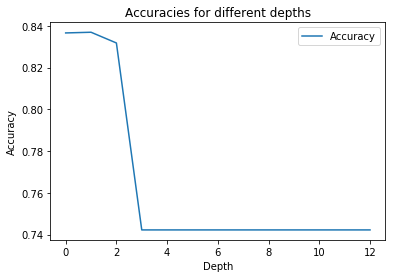

In [103]:
lists = sorted(Accuracies.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title('Accuracies for different depths')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend(['Accuracy'], loc='best')
plt.show()

<ul>
<h3>Question 2 - Sure it converges</h3>
</ul>

In [75]:
history = model.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=1000, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3502 - accuracy: 0.8383 - val_loss: 0.3503 - val_accuracy: 0.8379
Epoch 2/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3500 - accuracy: 0.8386 - val_loss: 0.3502 - val_accuracy: 0.8374
Epoch 3/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3499 - accuracy: 0.8386 - val_loss: 0.3501 - val_accuracy: 0.8374
Epoch 4/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3498 - accuracy: 0.8385 - val_loss: 0.3499 - val_accuracy: 0.8371
Epoch 5/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3497 - accuracy: 0.8386 - val_loss: 0.3498 - val_accuracy: 0.8374
Epoch 6/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3496 - accuracy: 0.8384 - val_loss: 0.3497 - val_accuracy: 0.8371
Epoch 7/1000
24129/24129 [==============================] - 0s 

Epoch 56/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3461 - accuracy: 0.8396 - val_loss: 0.3460 - val_accuracy: 0.8376
Epoch 57/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3461 - accuracy: 0.8393 - val_loss: 0.3460 - val_accuracy: 0.8374
Epoch 58/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3460 - accuracy: 0.8391 - val_loss: 0.3459 - val_accuracy: 0.8372
Epoch 59/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3460 - accuracy: 0.8397 - val_loss: 0.3458 - val_accuracy: 0.8371
Epoch 60/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3459 - accuracy: 0.8392 - val_loss: 0.3458 - val_accuracy: 0.8374
Epoch 61/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3459 - accuracy: 0.8393 - val_loss: 0.3458 - val_accuracy: 0.8374
Epoch 62/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3458 - accuracy: 0.8394

Epoch 111/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3440 - accuracy: 0.8398 - val_loss: 0.3438 - val_accuracy: 0.8374
Epoch 112/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3440 - accuracy: 0.8395 - val_loss: 0.3438 - val_accuracy: 0.8374
Epoch 113/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3440 - accuracy: 0.8397 - val_loss: 0.3438 - val_accuracy: 0.8372
Epoch 114/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3439 - accuracy: 0.8400 - val_loss: 0.3437 - val_accuracy: 0.8369
Epoch 115/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3439 - accuracy: 0.8399 - val_loss: 0.3437 - val_accuracy: 0.8372
Epoch 116/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3439 - accuracy: 0.8397 - val_loss: 0.3437 - val_accuracy: 0.8376
Epoch 117/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3438 - accuracy:

Epoch 220/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3420 - accuracy: 0.8411 - val_loss: 0.3416 - val_accuracy: 0.8372
Epoch 221/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3419 - accuracy: 0.8409 - val_loss: 0.3416 - val_accuracy: 0.8374
Epoch 222/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3419 - accuracy: 0.8409 - val_loss: 0.3416 - val_accuracy: 0.8374
Epoch 223/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3419 - accuracy: 0.8408 - val_loss: 0.3416 - val_accuracy: 0.8374
Epoch 224/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3419 - accuracy: 0.8410 - val_loss: 0.3416 - val_accuracy: 0.8374
Epoch 225/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3419 - accuracy: 0.8407 - val_loss: 0.3416 - val_accuracy: 0.8376
Epoch 226/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3419 - accuracy:

Epoch 329/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3410 - accuracy: 0.8411 - val_loss: 0.3406 - val_accuracy: 0.8389
Epoch 330/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3410 - accuracy: 0.8414 - val_loss: 0.3405 - val_accuracy: 0.8376
Epoch 331/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3410 - accuracy: 0.8411 - val_loss: 0.3405 - val_accuracy: 0.8379
Epoch 332/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3410 - accuracy: 0.8414 - val_loss: 0.3406 - val_accuracy: 0.8382
Epoch 333/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3410 - accuracy: 0.8411 - val_loss: 0.3406 - val_accuracy: 0.8386
Epoch 334/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3410 - accuracy: 0.8410 - val_loss: 0.3406 - val_accuracy: 0.8387
Epoch 335/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3410 - accuracy:

Epoch 438/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3405 - accuracy: 0.8415 - val_loss: 0.3400 - val_accuracy: 0.8379
Epoch 439/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3405 - accuracy: 0.8420 - val_loss: 0.3400 - val_accuracy: 0.8379
Epoch 440/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3405 - accuracy: 0.8415 - val_loss: 0.3400 - val_accuracy: 0.8379
Epoch 441/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3405 - accuracy: 0.8417 - val_loss: 0.3400 - val_accuracy: 0.8382
Epoch 442/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3405 - accuracy: 0.8418 - val_loss: 0.3400 - val_accuracy: 0.8381
Epoch 443/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3405 - accuracy: 0.8416 - val_loss: 0.3400 - val_accuracy: 0.8382
Epoch 444/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3405 - accuracy:

Epoch 547/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3402 - accuracy: 0.8413 - val_loss: 0.3397 - val_accuracy: 0.8392
Epoch 548/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3402 - accuracy: 0.8415 - val_loss: 0.3397 - val_accuracy: 0.8392
Epoch 549/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3402 - accuracy: 0.8410 - val_loss: 0.3397 - val_accuracy: 0.8391
Epoch 550/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3402 - accuracy: 0.8413 - val_loss: 0.3397 - val_accuracy: 0.8392
Epoch 551/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3402 - accuracy: 0.8416 - val_loss: 0.3397 - val_accuracy: 0.8392
Epoch 552/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3402 - accuracy: 0.8414 - val_loss: 0.3397 - val_accuracy: 0.8392
Epoch 553/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3402 - accuracy:

Epoch 656/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3401 - accuracy: 0.8413 - val_loss: 0.3395 - val_accuracy: 0.8400
Epoch 657/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3401 - accuracy: 0.8412 - val_loss: 0.3395 - val_accuracy: 0.8399
Epoch 658/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3401 - accuracy: 0.8413 - val_loss: 0.3395 - val_accuracy: 0.8400
Epoch 659/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3401 - accuracy: 0.8412 - val_loss: 0.3395 - val_accuracy: 0.8395
Epoch 660/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3401 - accuracy: 0.8413 - val_loss: 0.3395 - val_accuracy: 0.8397
Epoch 661/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3401 - accuracy: 0.8412 - val_loss: 0.3395 - val_accuracy: 0.8397
Epoch 662/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3401 - accurac

Epoch 765/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3400 - accuracy: 0.8413 - val_loss: 0.3394 - val_accuracy: 0.8399
Epoch 766/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3400 - accuracy: 0.8411 - val_loss: 0.3394 - val_accuracy: 0.8399
Epoch 767/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3400 - accuracy: 0.8412 - val_loss: 0.3394 - val_accuracy: 0.8399
Epoch 768/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3400 - accuracy: 0.8411 - val_loss: 0.3394 - val_accuracy: 0.8399
Epoch 769/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3400 - accuracy: 0.8413 - val_loss: 0.3394 - val_accuracy: 0.8399
Epoch 770/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3400 - accuracy: 0.8409 - val_loss: 0.3393 - val_accuracy: 0.8395
Epoch 771/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3400 - accuracy:

Epoch 874/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8414 - val_loss: 0.3393 - val_accuracy: 0.8402
Epoch 875/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3399 - accuracy: 0.8414 - val_loss: 0.3393 - val_accuracy: 0.8399
Epoch 876/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3399 - accuracy: 0.8410 - val_loss: 0.3393 - val_accuracy: 0.8397
Epoch 877/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8415 - val_loss: 0.3393 - val_accuracy: 0.8400
Epoch 878/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8411 - val_loss: 0.3393 - val_accuracy: 0.8397
Epoch 879/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8411 - val_loss: 0.3393 - val_accuracy: 0.8399
Epoch 880/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy:

Epoch 983/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8411 - val_loss: 0.3392 - val_accuracy: 0.8397
Epoch 984/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8415 - val_loss: 0.3393 - val_accuracy: 0.8397
Epoch 985/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8409 - val_loss: 0.3392 - val_accuracy: 0.8400
Epoch 986/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3399 - accuracy: 0.8410 - val_loss: 0.3392 - val_accuracy: 0.8397
Epoch 987/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3399 - accuracy: 0.8408 - val_loss: 0.3392 - val_accuracy: 0.8400
Epoch 988/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3399 - accuracy: 0.8412 - val_loss: 0.3392 - val_accuracy: 0.8399
Epoch 989/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy:

In [76]:
history1 = model1.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=1000, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3502 - accuracy: 0.8377 - val_loss: 0.3499 - val_accuracy: 0.8364
Epoch 2/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3501 - accuracy: 0.8373 - val_loss: 0.3497 - val_accuracy: 0.8366
Epoch 3/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3500 - accuracy: 0.8375 - val_loss: 0.3496 - val_accuracy: 0.8372
Epoch 4/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3498 - accuracy: 0.8373 - val_loss: 0.3494 - val_accuracy: 0.8364
Epoch 5/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3497 - accuracy: 0.8376 - val_loss: 0.3493 - val_accuracy: 0.8362
Epoch 6/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3495 - accuracy: 0.8377 - val_loss: 0.3492 - val_accuracy: 0.8372
Epoch 7/1000
24129/24129 [==============================] - 0s 

Epoch 56/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3449 - accuracy: 0.8395 - val_loss: 0.3443 - val_accuracy: 0.8382
Epoch 57/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3448 - accuracy: 0.8393 - val_loss: 0.3443 - val_accuracy: 0.8382
Epoch 58/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3447 - accuracy: 0.8389 - val_loss: 0.3443 - val_accuracy: 0.8379
Epoch 59/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3447 - accuracy: 0.8393 - val_loss: 0.3443 - val_accuracy: 0.8377
Epoch 60/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3446 - accuracy: 0.8396 - val_loss: 0.3442 - val_accuracy: 0.8377
Epoch 61/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3446 - accuracy: 0.8394 - val_loss: 0.3441 - val_accuracy: 0.8381
Epoch 62/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3445 - accuracy: 0.8398

Epoch 111/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3423 - accuracy: 0.8405 - val_loss: 0.3420 - val_accuracy: 0.8377
Epoch 112/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3423 - accuracy: 0.8406 - val_loss: 0.3420 - val_accuracy: 0.8377
Epoch 113/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3422 - accuracy: 0.8405 - val_loss: 0.3419 - val_accuracy: 0.8379
Epoch 114/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3422 - accuracy: 0.8398 - val_loss: 0.3419 - val_accuracy: 0.8377
Epoch 115/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3421 - accuracy: 0.8405 - val_loss: 0.3419 - val_accuracy: 0.8376
Epoch 116/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3421 - accuracy: 0.8406 - val_loss: 0.3418 - val_accuracy: 0.8376
Epoch 117/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3420 - accuracy:

24129/24129 [==============================] - 0s 8us/step - loss: 0.3400 - accuracy: 0.8405 - val_loss: 0.3397 - val_accuracy: 0.8379
Epoch 220/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3399 - accuracy: 0.8400 - val_loss: 0.3398 - val_accuracy: 0.8381
Epoch 221/1000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3399 - accuracy: 0.8405 - val_loss: 0.3398 - val_accuracy: 0.8381
Epoch 222/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3399 - accuracy: 0.8402 - val_loss: 0.3397 - val_accuracy: 0.8377
Epoch 223/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3399 - accuracy: 0.8404 - val_loss: 0.3398 - val_accuracy: 0.8381
Epoch 224/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3399 - accuracy: 0.8404 - val_loss: 0.3398 - val_accuracy: 0.8382
Epoch 225/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3399 - accuracy: 0.8403 - 

Epoch 328/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3390 - accuracy: 0.8408 - val_loss: 0.3388 - val_accuracy: 0.8387
Epoch 329/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3390 - accuracy: 0.8413 - val_loss: 0.3389 - val_accuracy: 0.8381
Epoch 330/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3390 - accuracy: 0.8414 - val_loss: 0.3389 - val_accuracy: 0.8387
Epoch 331/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3390 - accuracy: 0.8410 - val_loss: 0.3388 - val_accuracy: 0.8391
Epoch 332/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3389 - accuracy: 0.8411 - val_loss: 0.3388 - val_accuracy: 0.8391
Epoch 333/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3389 - accuracy: 0.8408 - val_loss: 0.3387 - val_accuracy: 0.8389
Epoch 334/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3389 - accuracy:

Epoch 437/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3384 - accuracy: 0.8413 - val_loss: 0.3383 - val_accuracy: 0.8386
Epoch 438/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3384 - accuracy: 0.8413 - val_loss: 0.3382 - val_accuracy: 0.8392
Epoch 439/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3384 - accuracy: 0.8414 - val_loss: 0.3383 - val_accuracy: 0.8379
Epoch 440/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3384 - accuracy: 0.8414 - val_loss: 0.3383 - val_accuracy: 0.8381
Epoch 441/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3384 - accuracy: 0.8414 - val_loss: 0.3382 - val_accuracy: 0.8391
Epoch 442/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3384 - accuracy: 0.8414 - val_loss: 0.3382 - val_accuracy: 0.8391
Epoch 443/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3384 - accuracy:

Epoch 546/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3380 - accuracy: 0.8414 - val_loss: 0.3379 - val_accuracy: 0.8391
Epoch 547/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3380 - accuracy: 0.8412 - val_loss: 0.3380 - val_accuracy: 0.8389
Epoch 548/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3380 - accuracy: 0.8412 - val_loss: 0.3378 - val_accuracy: 0.8387
Epoch 549/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3380 - accuracy: 0.8414 - val_loss: 0.3378 - val_accuracy: 0.8384
Epoch 550/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3380 - accuracy: 0.8412 - val_loss: 0.3378 - val_accuracy: 0.8376
Epoch 551/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3379 - accuracy: 0.8411 - val_loss: 0.3380 - val_accuracy: 0.8389
Epoch 552/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3380 - accuracy:

Epoch 655/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3376 - accuracy: 0.8415 - val_loss: 0.3375 - val_accuracy: 0.8394
Epoch 656/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3375 - accuracy: 0.8411 - val_loss: 0.3375 - val_accuracy: 0.8391
Epoch 657/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8417 - val_loss: 0.3376 - val_accuracy: 0.8392
Epoch 658/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8414 - val_loss: 0.3375 - val_accuracy: 0.8391
Epoch 659/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8414 - val_loss: 0.3375 - val_accuracy: 0.8391
Epoch 660/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8415 - val_loss: 0.3375 - val_accuracy: 0.8395
Epoch 661/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3376 - accuracy:

Epoch 764/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3372 - accuracy: 0.8417 - val_loss: 0.3372 - val_accuracy: 0.8399
Epoch 765/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3371 - accuracy: 0.8414 - val_loss: 0.3371 - val_accuracy: 0.8392
Epoch 766/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3371 - accuracy: 0.8416 - val_loss: 0.3372 - val_accuracy: 0.8397
Epoch 767/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3372 - accuracy: 0.8419 - val_loss: 0.3372 - val_accuracy: 0.8399
Epoch 768/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3372 - accuracy: 0.8415 - val_loss: 0.3371 - val_accuracy: 0.8389
Epoch 769/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3371 - accuracy: 0.8421 - val_loss: 0.3372 - val_accuracy: 0.8394
Epoch 770/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3372 - accuracy:

Epoch 873/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3367 - accuracy: 0.8417 - val_loss: 0.3369 - val_accuracy: 0.8399
Epoch 874/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3367 - accuracy: 0.8417 - val_loss: 0.3369 - val_accuracy: 0.8397
Epoch 875/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3367 - accuracy: 0.8422 - val_loss: 0.3368 - val_accuracy: 0.8399
Epoch 876/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3367 - accuracy: 0.8422 - val_loss: 0.3369 - val_accuracy: 0.8391
Epoch 877/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3367 - accuracy: 0.8418 - val_loss: 0.3368 - val_accuracy: 0.8394
Epoch 878/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3367 - accuracy: 0.8418 - val_loss: 0.3368 - val_accuracy: 0.8394
Epoch 879/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3367 - accuracy:

Epoch 982/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3363 - accuracy: 0.8420 - val_loss: 0.3367 - val_accuracy: 0.8386
Epoch 983/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3363 - accuracy: 0.8416 - val_loss: 0.3366 - val_accuracy: 0.8395
Epoch 984/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3363 - accuracy: 0.8421 - val_loss: 0.3366 - val_accuracy: 0.8395
Epoch 985/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3363 - accuracy: 0.8420 - val_loss: 0.3365 - val_accuracy: 0.8395
Epoch 986/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3362 - accuracy: 0.8423 - val_loss: 0.3366 - val_accuracy: 0.8394
Epoch 987/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3363 - accuracy: 0.8417 - val_loss: 0.3365 - val_accuracy: 0.8395
Epoch 988/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3362 - accuracy:

In [77]:
history2 = model2.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=1000, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3645 - accuracy: 0.8328 - val_loss: 0.3654 - val_accuracy: 0.8319
Epoch 2/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3640 - accuracy: 0.8326 - val_loss: 0.3649 - val_accuracy: 0.8323
Epoch 3/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3635 - accuracy: 0.8333 - val_loss: 0.3643 - val_accuracy: 0.8311
Epoch 4/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3629 - accuracy: 0.8340 - val_loss: 0.3638 - val_accuracy: 0.8328
Epoch 5/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3625 - accuracy: 0.8337 - val_loss: 0.3632 - val_accuracy: 0.8321
Epoch 6/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3620 - accuracy: 0.8336 - val_loss: 0.3628 - val_accuracy: 0.8324
Epoch 7/1000
24129/24129 [==============================] - 0s 

Epoch 56/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3487 - accuracy: 0.8381 - val_loss: 0.3486 - val_accuracy: 0.8366
Epoch 57/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3486 - accuracy: 0.8380 - val_loss: 0.3485 - val_accuracy: 0.8357
Epoch 58/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3485 - accuracy: 0.8376 - val_loss: 0.3485 - val_accuracy: 0.8362
Epoch 59/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3483 - accuracy: 0.8386 - val_loss: 0.3483 - val_accuracy: 0.8361
Epoch 60/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3481 - accuracy: 0.8386 - val_loss: 0.3483 - val_accuracy: 0.8374
Epoch 61/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3481 - accuracy: 0.8385 - val_loss: 0.3480 - val_accuracy: 0.8364
Epoch 62/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3479 - accuracy: 0.8385

Epoch 111/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3439 - accuracy: 0.8396 - val_loss: 0.3438 - val_accuracy: 0.8371
Epoch 112/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3438 - accuracy: 0.8392 - val_loss: 0.3438 - val_accuracy: 0.8367
Epoch 113/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3437 - accuracy: 0.8398 - val_loss: 0.3437 - val_accuracy: 0.8367
Epoch 114/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3437 - accuracy: 0.8396 - val_loss: 0.3439 - val_accuracy: 0.8372
Epoch 115/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3437 - accuracy: 0.8398 - val_loss: 0.3437 - val_accuracy: 0.8367
Epoch 116/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3436 - accuracy: 0.8399 - val_loss: 0.3436 - val_accuracy: 0.8381
Epoch 117/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3435 - accuracy:

Epoch 220/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3404 - accuracy: 0.8412 - val_loss: 0.3405 - val_accuracy: 0.8381
Epoch 221/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3403 - accuracy: 0.8406 - val_loss: 0.3408 - val_accuracy: 0.8384
Epoch 222/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3404 - accuracy: 0.8407 - val_loss: 0.3405 - val_accuracy: 0.8384
Epoch 223/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3404 - accuracy: 0.8406 - val_loss: 0.3405 - val_accuracy: 0.8384
Epoch 224/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3403 - accuracy: 0.8404 - val_loss: 0.3409 - val_accuracy: 0.8386
Epoch 225/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3403 - accuracy: 0.8407 - val_loss: 0.3406 - val_accuracy: 0.8384
Epoch 226/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3403 - accuracy:

Epoch 329/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3393 - accuracy: 0.8411 - val_loss: 0.3394 - val_accuracy: 0.8399
Epoch 330/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3393 - accuracy: 0.8415 - val_loss: 0.3394 - val_accuracy: 0.8397
Epoch 331/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3393 - accuracy: 0.8410 - val_loss: 0.3393 - val_accuracy: 0.8399
Epoch 332/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3393 - accuracy: 0.8413 - val_loss: 0.3394 - val_accuracy: 0.8397
Epoch 333/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3393 - accuracy: 0.8415 - val_loss: 0.3394 - val_accuracy: 0.8394
Epoch 334/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3392 - accuracy: 0.8413 - val_loss: 0.3396 - val_accuracy: 0.8395
Epoch 335/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3393 - accuracy:

Epoch 438/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3387 - accuracy: 0.8407 - val_loss: 0.3387 - val_accuracy: 0.8400
Epoch 439/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3387 - accuracy: 0.8412 - val_loss: 0.3393 - val_accuracy: 0.8397
Epoch 440/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3387 - accuracy: 0.8409 - val_loss: 0.3387 - val_accuracy: 0.8400
Epoch 441/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3387 - accuracy: 0.8409 - val_loss: 0.3387 - val_accuracy: 0.8402
Epoch 442/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3387 - accuracy: 0.8412 - val_loss: 0.3388 - val_accuracy: 0.8402
Epoch 443/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3387 - accuracy: 0.8415 - val_loss: 0.3388 - val_accuracy: 0.8402
Epoch 444/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3387 - accuracy:

Epoch 547/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3381 - accuracy: 0.8412 - val_loss: 0.3386 - val_accuracy: 0.8409
Epoch 548/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3382 - accuracy: 0.8413 - val_loss: 0.3383 - val_accuracy: 0.8405
Epoch 549/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3382 - accuracy: 0.8413 - val_loss: 0.3383 - val_accuracy: 0.8405
Epoch 550/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3381 - accuracy: 0.8416 - val_loss: 0.3383 - val_accuracy: 0.8400
Epoch 551/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3382 - accuracy: 0.8416 - val_loss: 0.3383 - val_accuracy: 0.8395
Epoch 552/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3382 - accuracy: 0.8419 - val_loss: 0.3383 - val_accuracy: 0.8405
Epoch 553/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3382 - accuracy:

Epoch 656/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8419 - val_loss: 0.3379 - val_accuracy: 0.8402
Epoch 657/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8418 - val_loss: 0.3377 - val_accuracy: 0.8405
Epoch 658/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3375 - accuracy: 0.8415 - val_loss: 0.3378 - val_accuracy: 0.8407
Epoch 659/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8423 - val_loss: 0.3377 - val_accuracy: 0.8404
Epoch 660/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3375 - accuracy: 0.8416 - val_loss: 0.3382 - val_accuracy: 0.8405
Epoch 661/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy: 0.8415 - val_loss: 0.3380 - val_accuracy: 0.8399
Epoch 662/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3376 - accuracy:

Epoch 765/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3369 - accuracy: 0.8426 - val_loss: 0.3372 - val_accuracy: 0.8395
Epoch 766/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3370 - accuracy: 0.8420 - val_loss: 0.3372 - val_accuracy: 0.8405
Epoch 767/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3370 - accuracy: 0.8421 - val_loss: 0.3372 - val_accuracy: 0.8412
Epoch 768/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3369 - accuracy: 0.8423 - val_loss: 0.3373 - val_accuracy: 0.8407
Epoch 769/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3369 - accuracy: 0.8421 - val_loss: 0.3375 - val_accuracy: 0.8395
Epoch 770/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3369 - accuracy: 0.8424 - val_loss: 0.3373 - val_accuracy: 0.8397
Epoch 771/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3369 - accuracy:

24129/24129 [==============================] - 0s 10us/step - loss: 0.3362 - accuracy: 0.8423 - val_loss: 0.3368 - val_accuracy: 0.8404
Epoch 874/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3362 - accuracy: 0.8424 - val_loss: 0.3368 - val_accuracy: 0.8407
Epoch 875/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3362 - accuracy: 0.8420 - val_loss: 0.3367 - val_accuracy: 0.8409
Epoch 876/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3361 - accuracy: 0.8421 - val_loss: 0.3367 - val_accuracy: 0.8404
Epoch 877/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3362 - accuracy: 0.8423 - val_loss: 0.3367 - val_accuracy: 0.8394
Epoch 878/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3362 - accuracy: 0.8419 - val_loss: 0.3367 - val_accuracy: 0.8410
Epoch 879/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3362 - accuracy: 0.8424 - val_

Epoch 928/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3359 - accuracy: 0.8424 - val_loss: 0.3365 - val_accuracy: 0.8397
Epoch 929/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3358 - accuracy: 0.8424 - val_loss: 0.3367 - val_accuracy: 0.8394
Epoch 930/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3358 - accuracy: 0.8426 - val_loss: 0.3367 - val_accuracy: 0.8395
Epoch 931/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3358 - accuracy: 0.8424 - val_loss: 0.3365 - val_accuracy: 0.8402
Epoch 932/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3358 - accuracy: 0.8423 - val_loss: 0.3366 - val_accuracy: 0.8399
Epoch 933/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3358 - accuracy: 0.8423 - val_loss: 0.3364 - val_accuracy: 0.8402
Epoch 934/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3358 - accuracy:

<ul>
<h3>Question 4 - Autoencoders</h3>
</ul>

- Unsupervised machine learning algorithm
- compressed at the bottleneck
- compression in autoencoders is achieved by training the network for a period of time and as it learns it tries to best represent the input 
- Autoencoders are similar to dimensionality reduction techniques but in non-linear way

In [92]:
pip install graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'

SyntaxError: invalid syntax (<ipython-input-92-e5fcf82f55dc>, line 1)

In [91]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

<ul>
<h3>Cross-Validation</h3>
</ul>

In [62]:
from sklearn.model_selection import StratifiedKFold

In [505]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X_trainset, Y_trainset):
    
    #Define Keras Model
    model = Sequential()
    model.add(Dense(12, input_dim=66, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_trainset, Y_trainset, epochs=100, batch_size=200, verbose=0)
    
    # evaluate the model
    scores =  model.evaluate(X_testset, Y_testset, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 83.89%
accuracy: 83.89%
accuracy: 83.91%
accuracy: 84.05%
accuracy: 83.97%
83.94% (+/- 0.06%)


In [59]:
accuracy = model.evaluate(X_testset, Y_testset)
print('Accuracy: %.2f' % (accuracy[1]*100),'%')
print('Loss: %.2f' % (accuracy[0]*100),'%')

6033/6033 [==============================] - 0s 10us/step
Accuracy: 83.66 %
Loss: 35.03 %


In [63]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

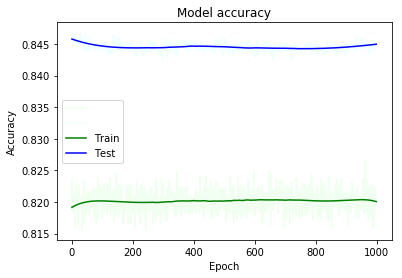

In [141]:
x = list(range(0, 1000))
y1 = history_dropout.history['accuracy'] 
y2 = history_dropout.history['val_accuracy'] 
yhat1 = savgol_filter(y1, 511, 5) # window size 51, polynomial order 3
yhat2 = savgol_filter(y2, 511, 4) # window size 51, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['', '', 'Train', 'Test'], loc='best')
plt.show()

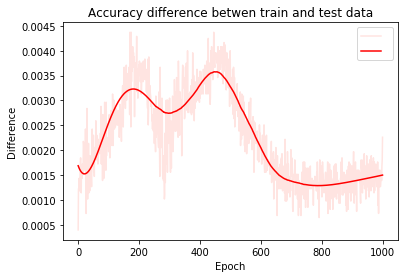

In [82]:
X = history.history['accuracy']
Y = history.history['val_accuracy'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 1000))
y = x_y
yhat = savgol_filter(y, 511, 5) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Accuracy difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

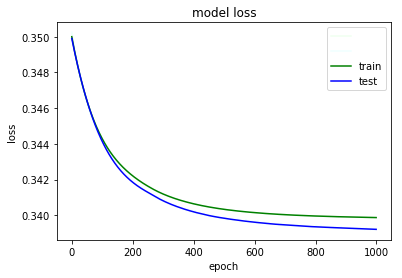

In [83]:
x = list(range(0, 1000))
y1 = history.history['loss'] 
y2 = history.history['val_loss'] 
yhat1 = savgol_filter(y1, 511, 5) # window size 501, polynomial order 3
yhat2 = savgol_filter(y2, 511, 4) # window size 501, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

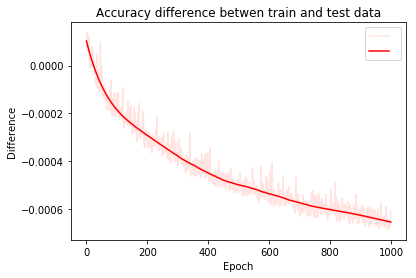

In [85]:
X = history.history['val_loss']
Y = history.history['loss'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 1000))
y = x_y
yhat = savgol_filter(y, 511, 5) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Accuracy difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

<ul>
<h3>Predictions</h3>
</ul>

In [26]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

In [27]:
predictions = model.predict_classes(X)

In [28]:
for i in range(10):
    print('%d (expected %d)' % (predictions[i], Y[i]))

0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
0 (expected 0)
1 (expected 0)
0 (expected 0)
0 (expected 1)
0 (expected 1)
1 (expected 1)


<ul>
<h3>Plot the ANN</h3>
</ul>

In [135]:
ann_viz(model_drop, title="Wealth Prediction")

<ul>
<h3>Noise into the data</h3>
</ul>

In [222]:
data_noise = data
data_noise.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States,bi_wealth
0,39,13,1,0,40,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,7,0,0,40,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,13,0,0,40,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [247]:
pure = np.linspace(-1, 1, 30162)
noise = np.random.normal(0, 2, pure.shape).astype(int).tolist()

In [249]:
data_noise['age'] = data_noise['age'] + noise
data_noise['hours_per_week'] = data_noise['hours_per_week'] + noise
norm_df_noise = (data_noise - data_noise.min()) / (data_noise.max() - data_noise.min())
norm_df_noise.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States,bi_wealth
0,0.33750,0.800000,1.0,0.0,0.424658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.53125,0.800000,0.0,0.0,0.267123,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.55000,0.533333,0.0,0.0,0.486301,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.70000,0.400000,0.0,0.0,0.520548,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37500,0.800000,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [255]:
X_noise = norm_df_noise[norm_df_noise.columns[:66]]
X_noise[0:2]

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_region_Asia,native_region_Europe,native_region_South&Central America,native_region_United_States
0,0.33750,0.8,1.0,0.0,0.424658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.53125,0.8,0.0,0.0,0.267123,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [254]:
Y_noise = norm_df_noise["bi_wealth"].astype(int)
Y_noise[0:5]

0    0
1    0
2    0
3    0
4    0
Name: bi_wealth, dtype: int32

In [259]:
X_trainset_noise, X_testset_noise, Y_trainset_noise, Y_testset_noise = train_test_split(X_noise, Y_noise, test_size=0.2, random_state=3)

In [263]:
model2 = Sequential()
model2.add(Dense(12, input_dim=66, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [264]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [270]:
history2 = model2.fit(X_trainset_noise, Y_trainset_noise, validation_data=(X_testset_noise,Y_testset_noise), epochs=1000, batch_size=100) #150 epochs normalyand 10 for batch

Train on 24129 samples, validate on 6033 samples
Epoch 1/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3241 - accuracy: 0.8480 - val_loss: 0.3550 - val_accuracy: 0.8339
Epoch 2/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3238 - accuracy: 0.8498 - val_loss: 0.3553 - val_accuracy: 0.8326
Epoch 3/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3239 - accuracy: 0.8491 - val_loss: 0.3560 - val_accuracy: 0.8303
Epoch 4/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3239 - accuracy: 0.8485 - val_loss: 0.3554 - val_accuracy: 0.8321
Epoch 5/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3237 - accuracy: 0.8486 - val_loss: 0.3573 - val_accuracy: 0.8289
Epoch 6/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3240 - accuracy: 0.8494 - val_loss: 0.3551 - val_accuracy: 0.8341
Epoch 7/1000
24129/24129 [==============================] - 0s 

Epoch 56/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3236 - accuracy: 0.8496 - val_loss: 0.3564 - val_accuracy: 0.8298
Epoch 57/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3234 - accuracy: 0.8488 - val_loss: 0.3564 - val_accuracy: 0.8354
Epoch 58/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3234 - accuracy: 0.8480 - val_loss: 0.3579 - val_accuracy: 0.8303
Epoch 59/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3235 - accuracy: 0.8485 - val_loss: 0.3558 - val_accuracy: 0.8308
Epoch 60/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3235 - accuracy: 0.8489 - val_loss: 0.3584 - val_accuracy: 0.8274
Epoch 61/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3235 - accuracy: 0.8491 - val_loss: 0.3556 - val_accuracy: 0.8334
Epoch 62/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3237 - accuracy: 0.8496

Epoch 111/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3230 - accuracy: 0.8494 - val_loss: 0.3551 - val_accuracy: 0.8351
Epoch 112/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3230 - accuracy: 0.8490 - val_loss: 0.3561 - val_accuracy: 0.8318
Epoch 113/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3231 - accuracy: 0.8495 - val_loss: 0.3561 - val_accuracy: 0.8319
Epoch 114/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3231 - accuracy: 0.8494 - val_loss: 0.3598 - val_accuracy: 0.8324
Epoch 115/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3235 - accuracy: 0.8486 - val_loss: 0.3557 - val_accuracy: 0.8321
Epoch 116/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3234 - accuracy: 0.8489 - val_loss: 0.3554 - val_accuracy: 0.8318
Epoch 117/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3232 - accuracy

24129/24129 [==============================] - 0s 8us/step - loss: 0.3224 - accuracy: 0.8496 - val_loss: 0.3564 - val_accuracy: 0.8336
Epoch 220/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3226 - accuracy: 0.8495 - val_loss: 0.3676 - val_accuracy: 0.8265
Epoch 221/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8495 - val_loss: 0.3606 - val_accuracy: 0.8321
Epoch 222/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8493 - val_loss: 0.3740 - val_accuracy: 0.8236
Epoch 223/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3229 - accuracy: 0.8490 - val_loss: 0.3572 - val_accuracy: 0.8328
Epoch 224/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3227 - accuracy: 0.8498 - val_loss: 0.3567 - val_accuracy: 0.8324
Epoch 225/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3223 - accuracy: 0.8500 - val_

Epoch 274/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3222 - accuracy: 0.8496 - val_loss: 0.3574 - val_accuracy: 0.8313
Epoch 275/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3221 - accuracy: 0.8494 - val_loss: 0.3577 - val_accuracy: 0.8309
Epoch 276/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3224 - accuracy: 0.8490 - val_loss: 0.3585 - val_accuracy: 0.8324
Epoch 277/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3221 - accuracy: 0.8507 - val_loss: 0.3578 - val_accuracy: 0.8331
Epoch 278/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3222 - accuracy: 0.8498 - val_loss: 0.3647 - val_accuracy: 0.8276
Epoch 279/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3225 - accuracy: 0.8495 - val_loss: 0.3576 - val_accuracy: 0.8323
Epoch 280/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3222 - accuracy

Epoch 383/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3217 - accuracy: 0.8506 - val_loss: 0.3580 - val_accuracy: 0.8314
Epoch 384/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3217 - accuracy: 0.8508 - val_loss: 0.3583 - val_accuracy: 0.8323
Epoch 385/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3214 - accuracy: 0.8510 - val_loss: 0.3586 - val_accuracy: 0.8313
Epoch 386/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3216 - accuracy: 0.8498 - val_loss: 0.3597 - val_accuracy: 0.8319
Epoch 387/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3216 - accuracy: 0.8495 - val_loss: 0.3584 - val_accuracy: 0.8318
Epoch 388/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3218 - accuracy: 0.8491 - val_loss: 0.3602 - val_accuracy: 0.8311
Epoch 389/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3220 - accuracy:

24129/24129 [==============================] - 0s 9us/step - loss: 0.3211 - accuracy: 0.8489 - val_loss: 0.3623 - val_accuracy: 0.8288
Epoch 492/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3216 - accuracy: 0.8503 - val_loss: 0.3580 - val_accuracy: 0.8321
Epoch 493/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3216 - accuracy: 0.8502 - val_loss: 0.3595 - val_accuracy: 0.8301
Epoch 494/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3214 - accuracy: 0.8506 - val_loss: 0.3689 - val_accuracy: 0.8263
Epoch 495/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3213 - accuracy: 0.8503 - val_loss: 0.3603 - val_accuracy: 0.8303
Epoch 496/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3213 - accuracy: 0.8509 - val_loss: 0.3586 - val_accuracy: 0.8329
Epoch 497/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3214 - accuracy: 0.8511 - val_l

24129/24129 [==============================] - 0s 9us/step - loss: 0.3207 - accuracy: 0.8510 - val_loss: 0.3621 - val_accuracy: 0.8276
Epoch 600/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3210 - accuracy: 0.8502 - val_loss: 0.3588 - val_accuracy: 0.8346
Epoch 601/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3209 - accuracy: 0.8496 - val_loss: 0.3609 - val_accuracy: 0.8296
Epoch 602/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3212 - accuracy: 0.8498 - val_loss: 0.3594 - val_accuracy: 0.8326
Epoch 603/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3208 - accuracy: 0.8509 - val_loss: 0.3596 - val_accuracy: 0.8321
Epoch 604/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3213 - accuracy: 0.8499 - val_loss: 0.3586 - val_accuracy: 0.8318
Epoch 605/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3210 - accuracy: 0.8501 - val_l

24129/24129 [==============================] - 0s 9us/step - loss: 0.3205 - accuracy: 0.8497 - val_loss: 0.3593 - val_accuracy: 0.8339
Epoch 708/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3205 - accuracy: 0.8513 - val_loss: 0.3605 - val_accuracy: 0.8298
Epoch 709/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3206 - accuracy: 0.8493 - val_loss: 0.3596 - val_accuracy: 0.8328
Epoch 710/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3207 - accuracy: 0.8499 - val_loss: 0.3595 - val_accuracy: 0.8341
Epoch 711/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3205 - accuracy: 0.8499 - val_loss: 0.3601 - val_accuracy: 0.8308
Epoch 712/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3206 - accuracy: 0.8510 - val_loss: 0.3670 - val_accuracy: 0.8274
Epoch 713/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3210 - accuracy: 0.8507 - val_l

Epoch 762/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3205 - accuracy: 0.8507 - val_loss: 0.3653 - val_accuracy: 0.8289
Epoch 763/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3205 - accuracy: 0.8506 - val_loss: 0.3606 - val_accuracy: 0.8291
Epoch 764/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3207 - accuracy: 0.8508 - val_loss: 0.3607 - val_accuracy: 0.8311
Epoch 765/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3207 - accuracy: 0.8511 - val_loss: 0.3634 - val_accuracy: 0.8289
Epoch 766/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3206 - accuracy: 0.8500 - val_loss: 0.3622 - val_accuracy: 0.8284
Epoch 767/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3206 - accuracy: 0.8508 - val_loss: 0.3634 - val_accuracy: 0.8283
Epoch 768/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3205 - accuracy:

24129/24129 [==============================] - 0s 9us/step - loss: 0.3200 - accuracy: 0.8511 - val_loss: 0.3622 - val_accuracy: 0.8289
Epoch 871/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3204 - accuracy: 0.8508 - val_loss: 0.3612 - val_accuracy: 0.8304
Epoch 872/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3201 - accuracy: 0.8511 - val_loss: 0.3702 - val_accuracy: 0.8291
Epoch 873/1000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3203 - accuracy: 0.8503 - val_loss: 0.3637 - val_accuracy: 0.8281
Epoch 874/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3202 - accuracy: 0.8502 - val_loss: 0.3599 - val_accuracy: 0.8329
Epoch 875/1000
24129/24129 [==============================] - 0s 10us/step - loss: 0.3201 - accuracy: 0.8511 - val_loss: 0.3643 - val_accuracy: 0.8288
Epoch 876/1000
24129/24129 [==============================] - 0s 11us/step - loss: 0.3204 - accuracy: 0.8509 - 

24129/24129 [==============================] - 0s 8us/step - loss: 0.3197 - accuracy: 0.8515 - val_loss: 0.3620 - val_accuracy: 0.8306
Epoch 979/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3199 - accuracy: 0.8508 - val_loss: 0.3625 - val_accuracy: 0.8304
Epoch 980/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3201 - accuracy: 0.8509 - val_loss: 0.3625 - val_accuracy: 0.8289
Epoch 981/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3201 - accuracy: 0.8512 - val_loss: 0.3616 - val_accuracy: 0.8286
Epoch 982/1000
24129/24129 [==============================] - 0s 9us/step - loss: 0.3201 - accuracy: 0.8497 - val_loss: 0.3606 - val_accuracy: 0.8293
Epoch 983/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3199 - accuracy: 0.8503 - val_loss: 0.3600 - val_accuracy: 0.8321
Epoch 984/1000
24129/24129 [==============================] - 0s 8us/step - loss: 0.3202 - accuracy: 0.8504 - val_l

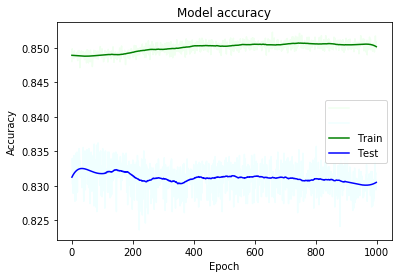

In [274]:
x = list(range(0, 1000))
y1 = history2.history['accuracy'] 
y2 = history2.history['val_accuracy'] 
yhat1 = savgol_filter(y1, 201, 5) # window size 51, polynomial order 3
yhat2 = savgol_filter(y2, 201, 4) # window size 51, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['', '', 'Train', 'Test'], loc='best')
plt.show()

https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab -> Dropout